In [1]:
#Core Libraries
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

#Visualization
from colorama import Fore, Style
import sweetviz as sv
from tqdm import tqdm
import matplotlib.pyplot as plt
import plotly.express as px

#Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

#Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb

#Metrics
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score

# Ensemble
from sklearn.ensemble import StackingClassifier, VotingClassifier

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\Zarul\Desktop\Data_Analyst\My_Project\Supervised\4_CreditCard_Fraud_Detection\creditcard_2023.csv')

In [3]:
df.head(2)

id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   

         V8        V9  ...       V21       V22       V23       V24      V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.12628   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.19009   

        V26       V27       V28    Amount  Class  
0 -0.434824 -0.081230 -0.151045  17982.10      0  
1  0.296503 -0.248052 -0.064512   6531.37      0  

[2 rows x 31 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [6]:
df.describe()

id            V1            V2            V3            V4  \
count  568630.000000  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean   284314.500000 -5.638058e-17 -1.319545e-16 -3.518788e-17 -2.879008e-17   
std    164149.486121  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min         0.000000 -3.495584e+00 -4.996657e+01 -3.183760e+00 -4.951222e+00   
25%    142157.250000 -5.652859e-01 -4.866777e-01 -6.492987e-01 -6.560203e-01   
50%    284314.500000 -9.363846e-02 -1.358939e-01  3.528579e-04 -7.376152e-02   
75%    426471.750000  8.326582e-01  3.435552e-01  6.285380e-01  7.070047e-01   
max    568629.000000  2.229046e+00  4.361865e+00  1.412583e+01  3.201536e+00   

                 V5            V6            V7            V8            V9  \
count  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean   7.997245e-18 -3.958636e-17 -3.198898e-17  2.109273e-17  3.998623e-17   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -9.952786e+00 -2.111111e+01 -4.351839e+00 -1.075634e+01 -3.751919e+00   
25%   -2.934955e-01 -4.458712e-01 -2.835329e-01 -1.922572e-01 -5.687446e-01   
50%    8.108788e-02  7.871758e-02  2.333659e-01 -1.145242e-01  9.252647e-02   
75%    4.397368e-01  4.977881e-01  5.259548e-01  4.729905e-02  5.592621e-01   
max    4.271689e+01  2.616840e+01  2.178730e+02  5.958040e+00  2.027006e+01   

       ...           V21           V22           V23           V24  \
count  ...  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean   ...  4.758361e-17  3.948640e-18  6.194741e-18 -2.799036e-18   
std    ...  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min    ... -1.938252e+01 -7.734798e+00 -3.029545e+01 -4.067968e+00   
25%    ... -1.664408e-01 -4.904892e-01 -2.376289e-01 -6.515801e-01   
50%    ... -3.743065e-02 -2.732881e-02 -5.968903e-02  1.590123e-02   
75%    ...  1.479787e-01  4.638817e-01  1.557153e-01  7.007374e-01   
max    ...  8.087080e+00  1.263251e+01  3.170763e+01  1.296564e+01   

                V25           V26           V27           V28         Amount  \
count  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05  568630.000000   
mean  -3.178905e-17 -7.497417e-18 -3.598760e-17  2.609101e-17   12041.957635   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00    6919.644449   
min   -1.361263e+01 -8.226969e+00 -1.049863e+01 -3.903524e+01      50.010000   
25%   -5.541485e-01 -6.318948e-01 -3.049607e-01 -2.318783e-01    6054.892500   
50%   -8.193162e-03 -1.189208e-02 -1.729111e-01 -1.392973e-02   12030.150000   
75%    5.500147e-01  6.728879e-01  3.340230e-01  4.095903e-01   18036.330000   
max    1.462151e+01  5.623285e+00  1.132311e+02  7.725594e+01   24039.930000   

          Class  
count  568630.0  
mean        0.5  
std         0.5  
min         0.0  
25%         0.0  
50%         0.5  
75%         1.0  
max         1.0  

[8 rows x 31 columns]

                                             |          | [  0%]   00:00 -> (? left)


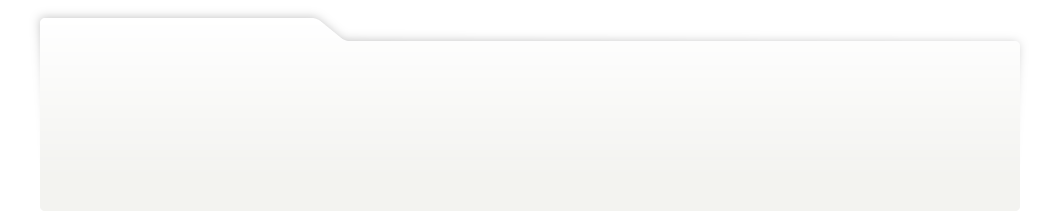
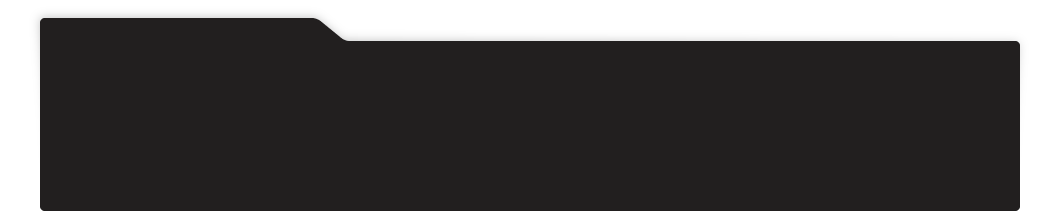
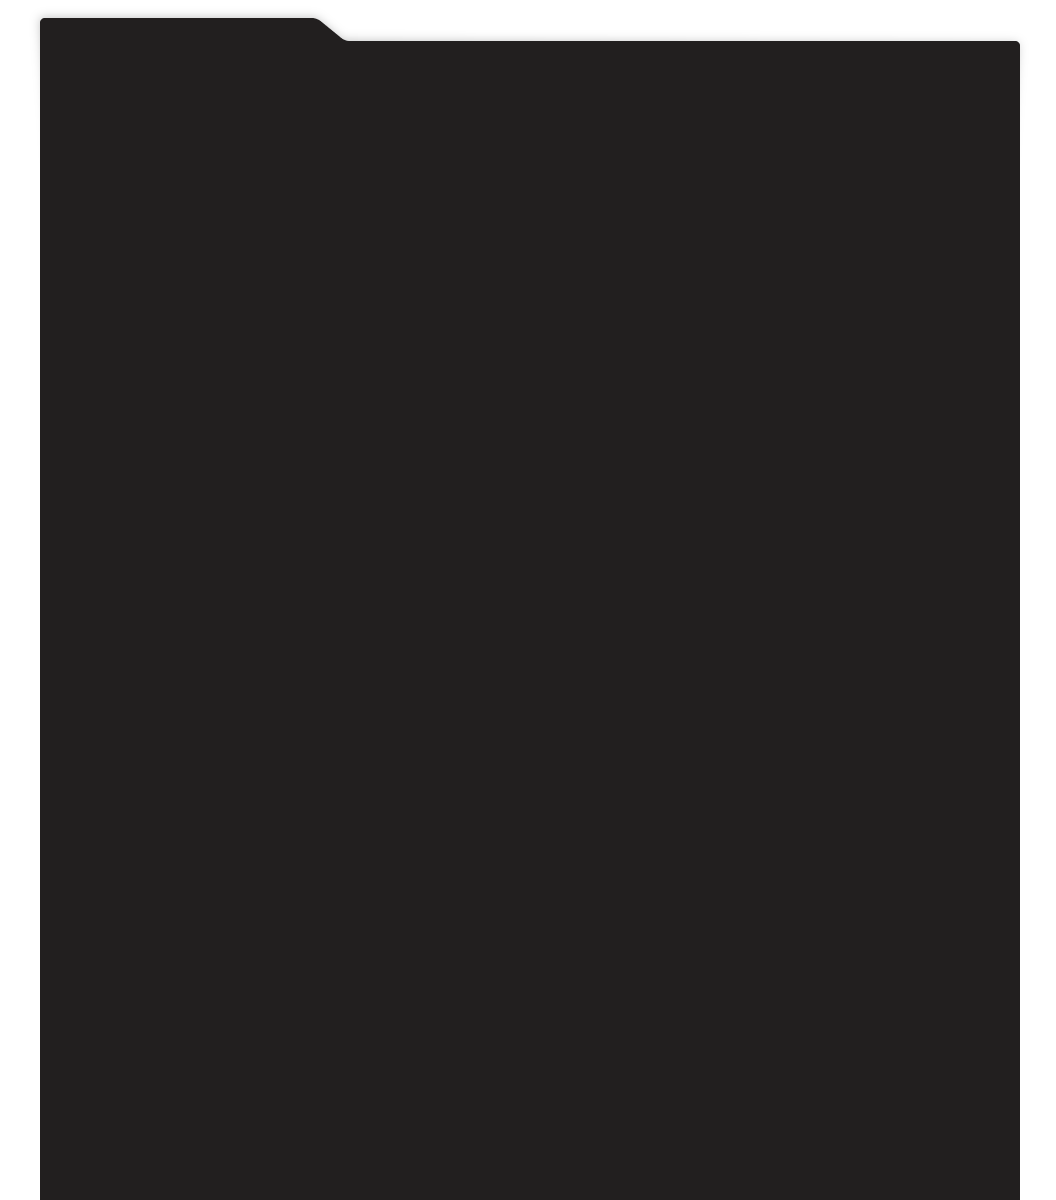
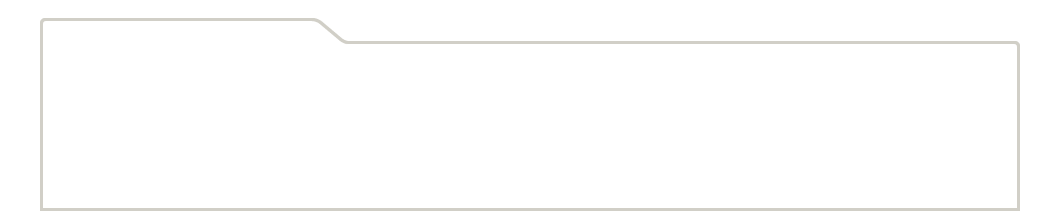
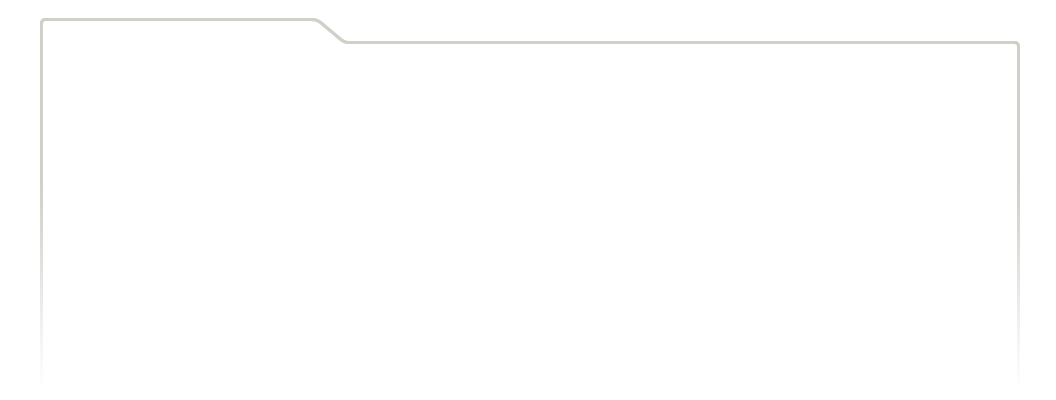
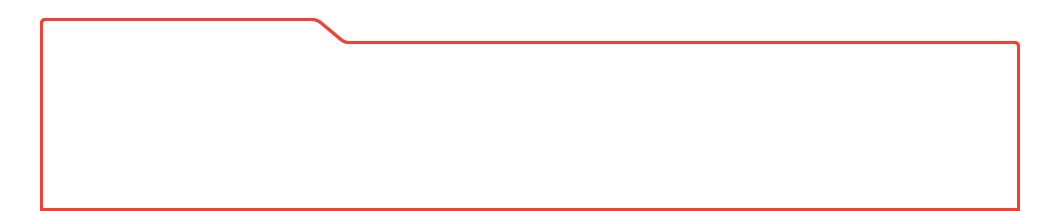
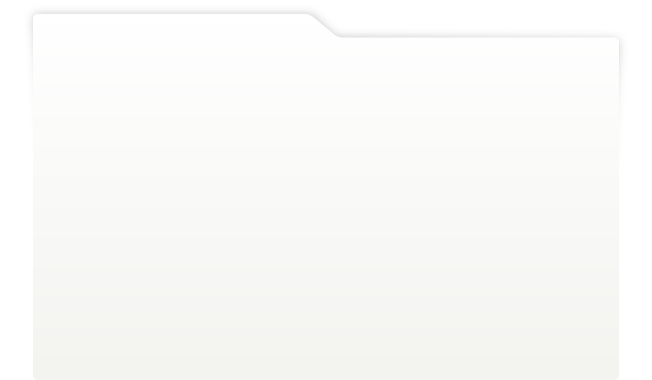
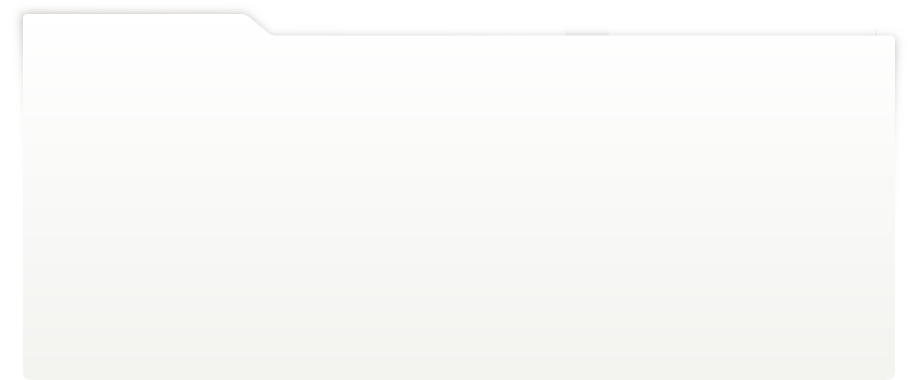
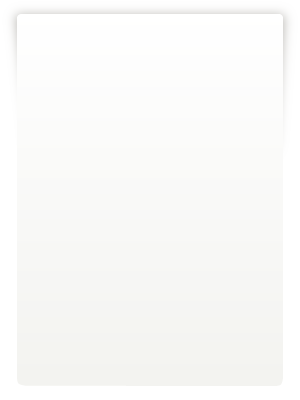
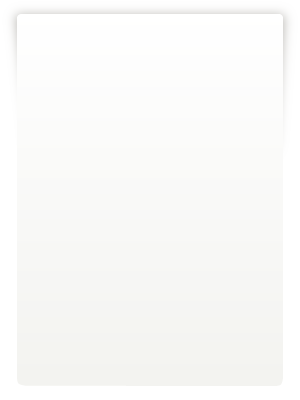
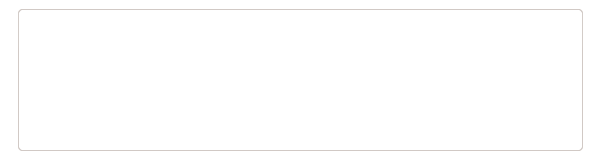
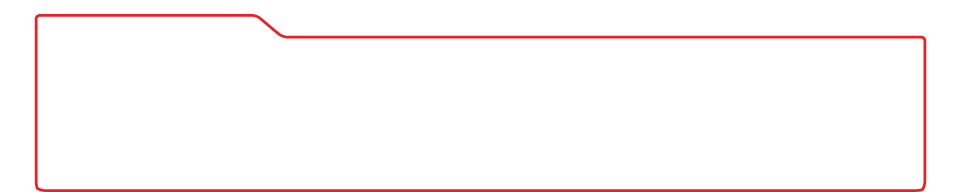
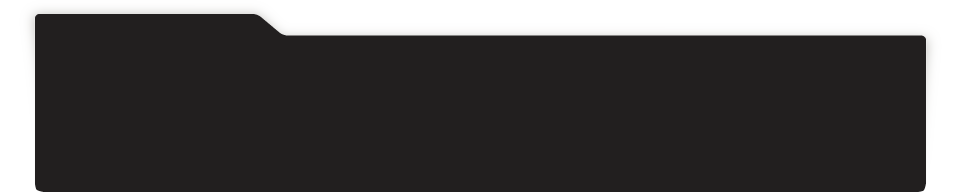
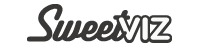
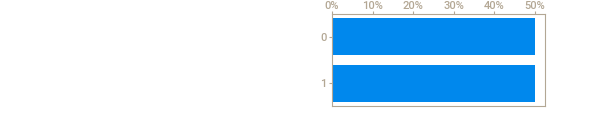
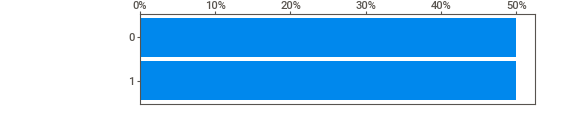
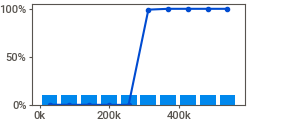
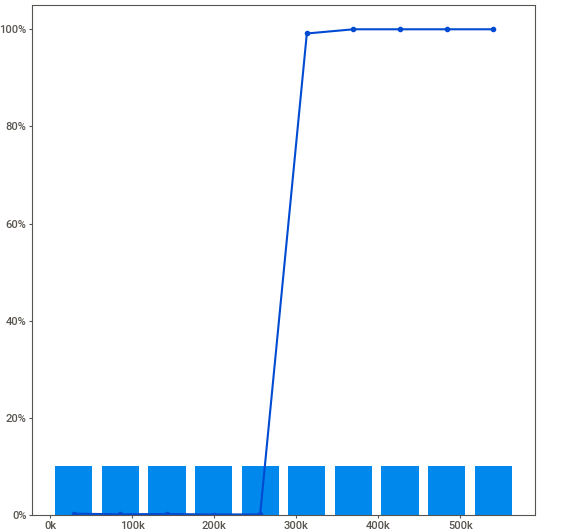
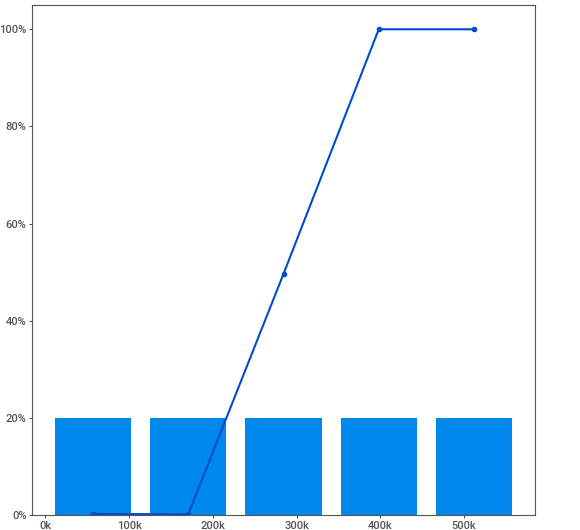
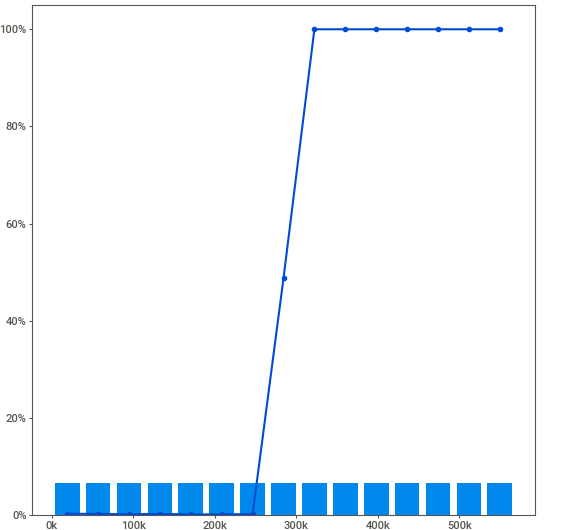
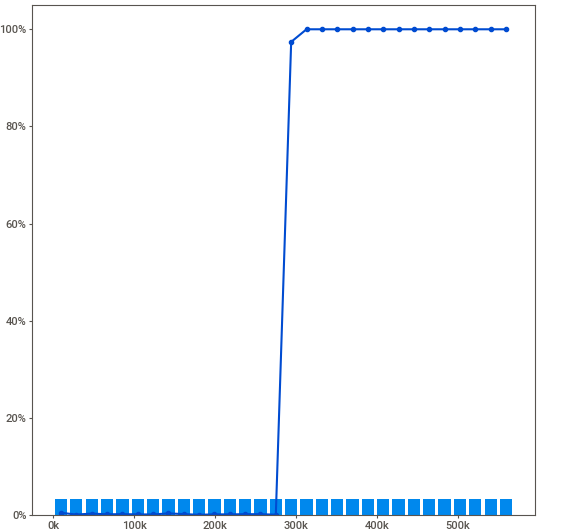
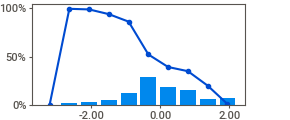
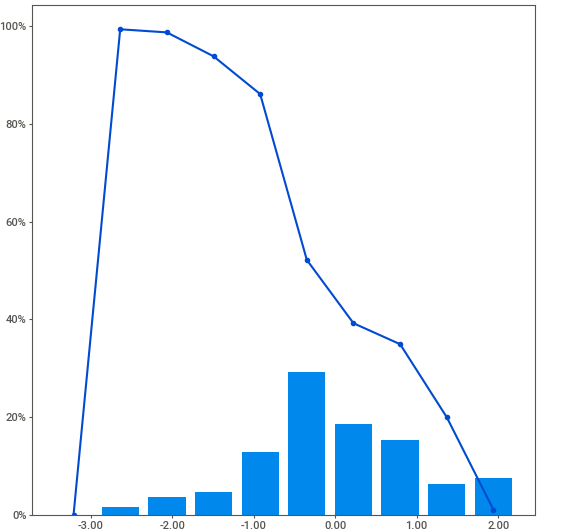
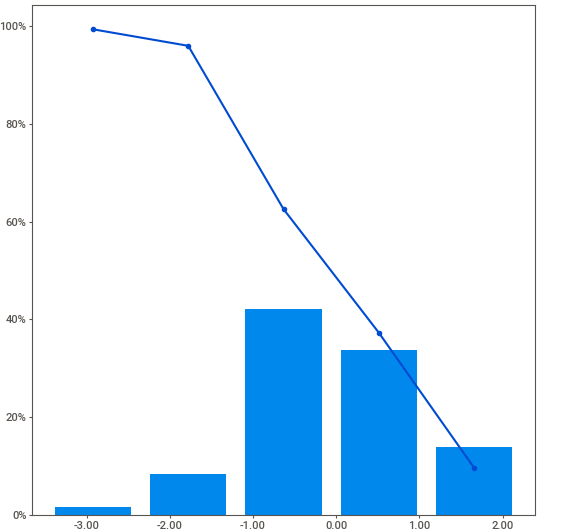
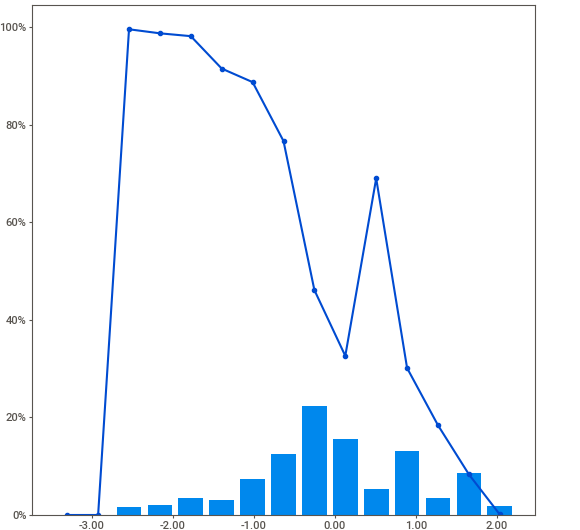
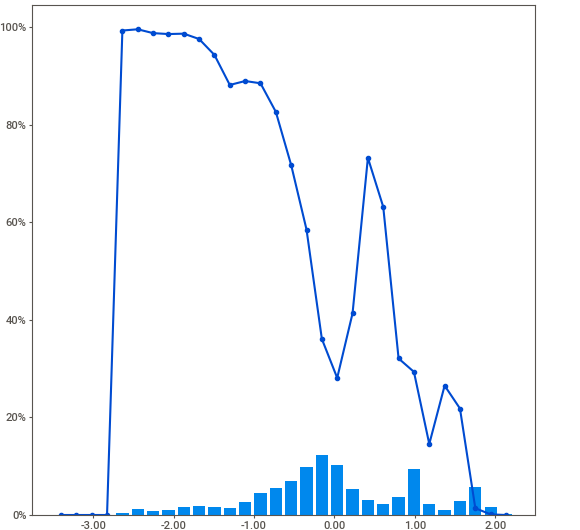
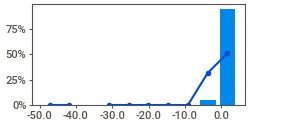
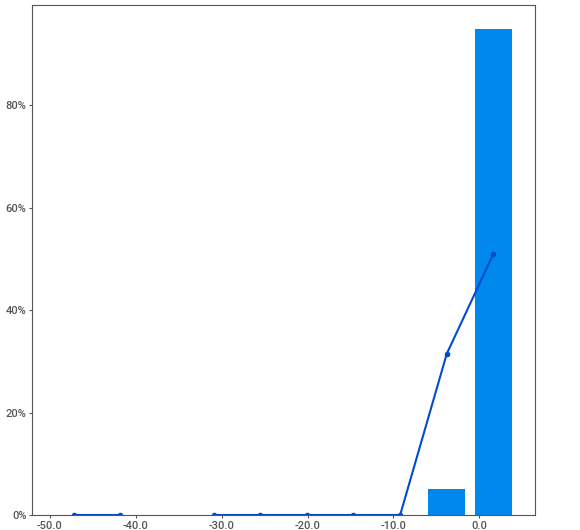
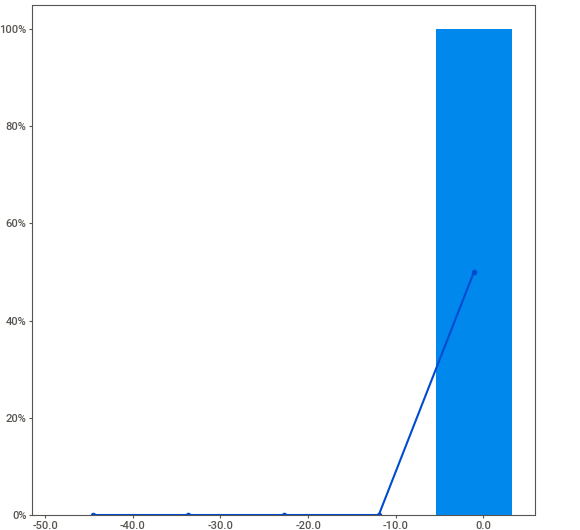
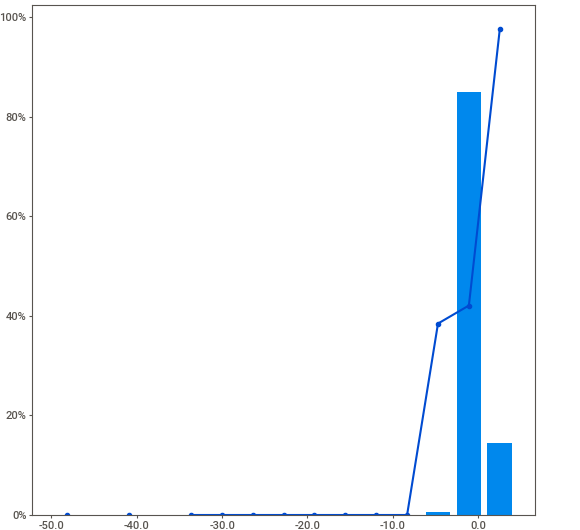
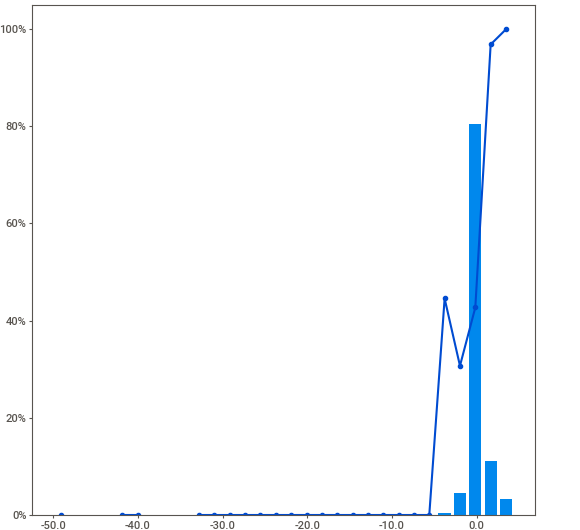
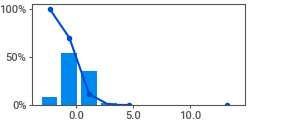
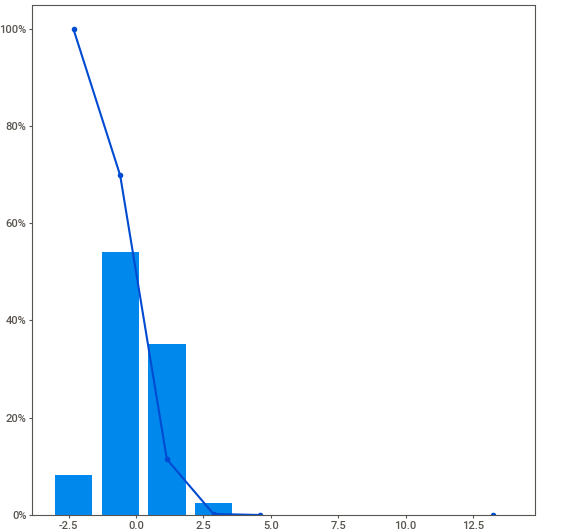
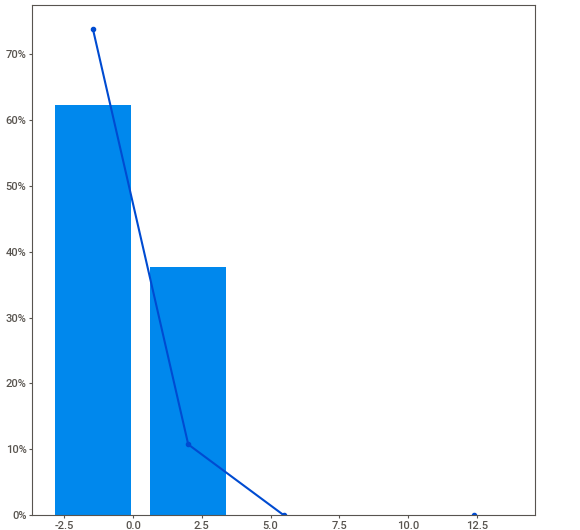
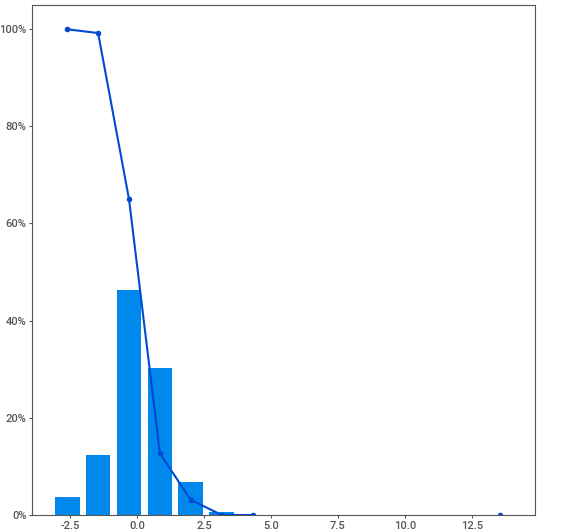
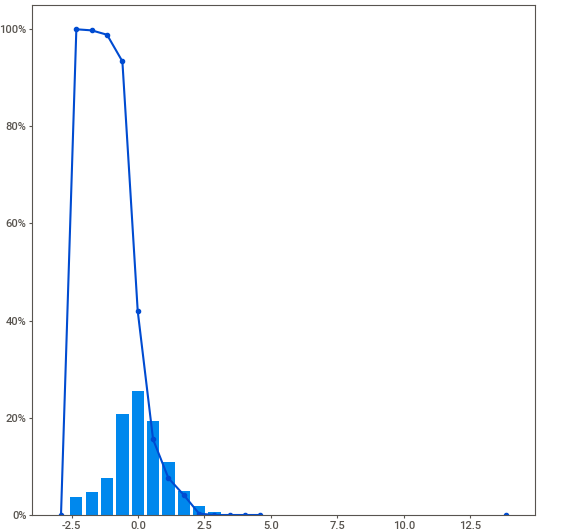
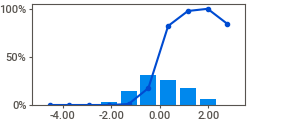
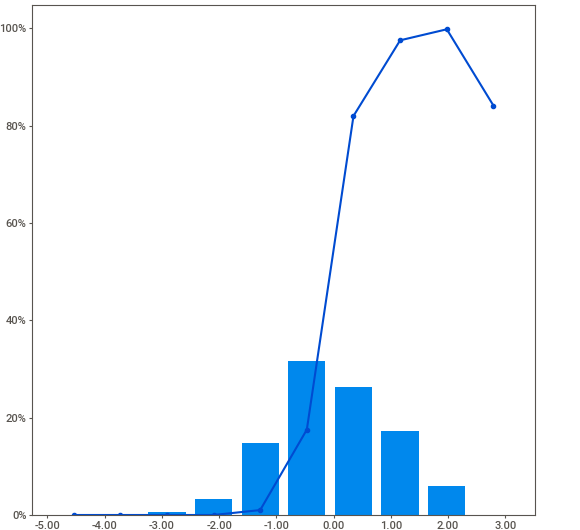
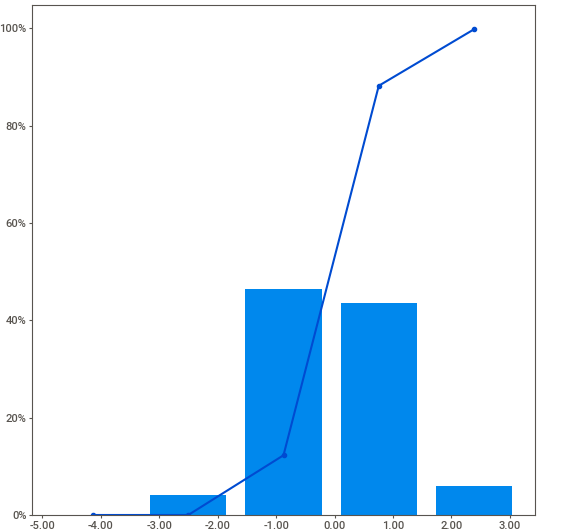
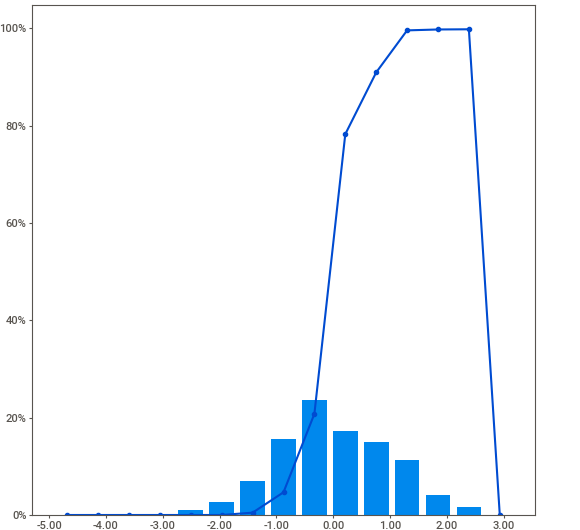
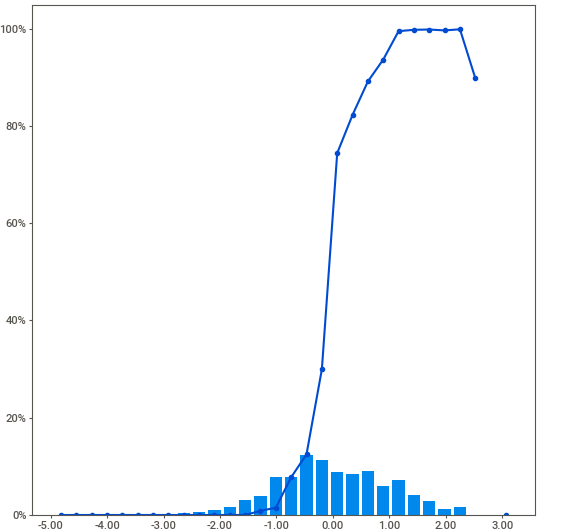
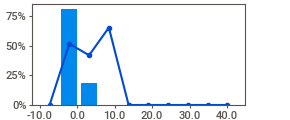
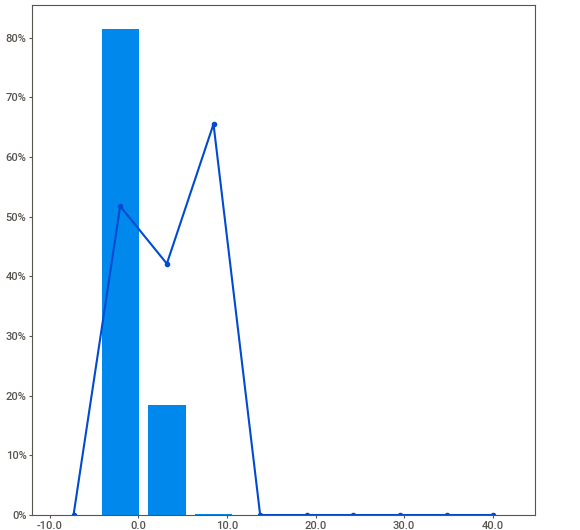
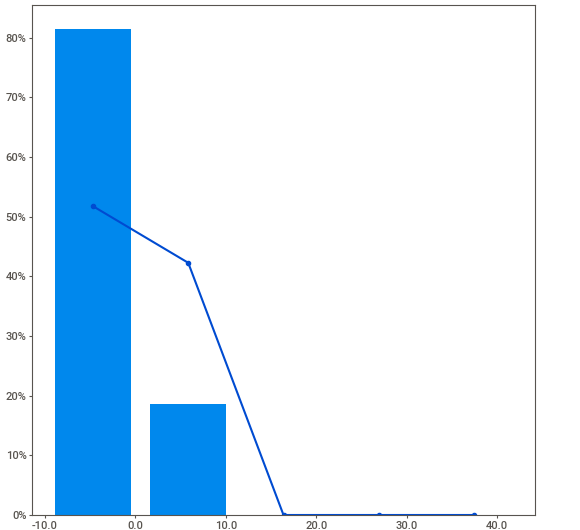
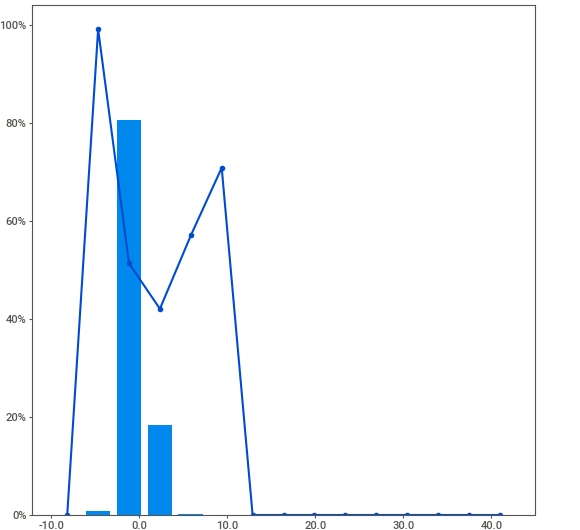
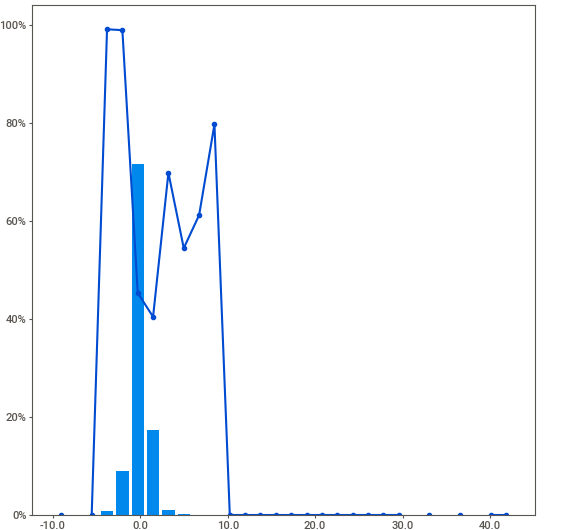
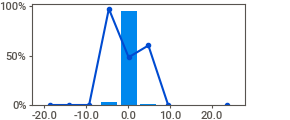
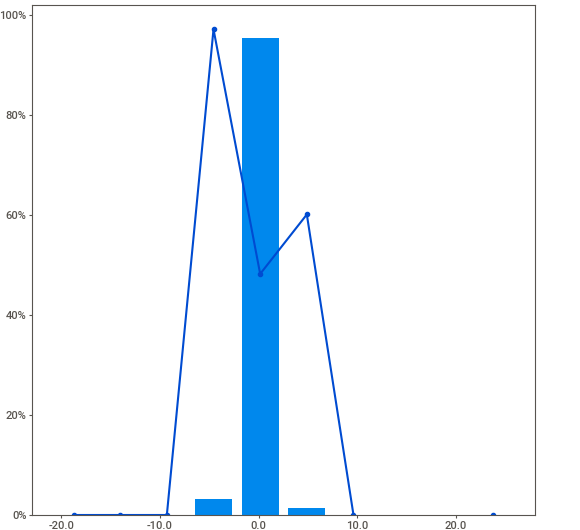
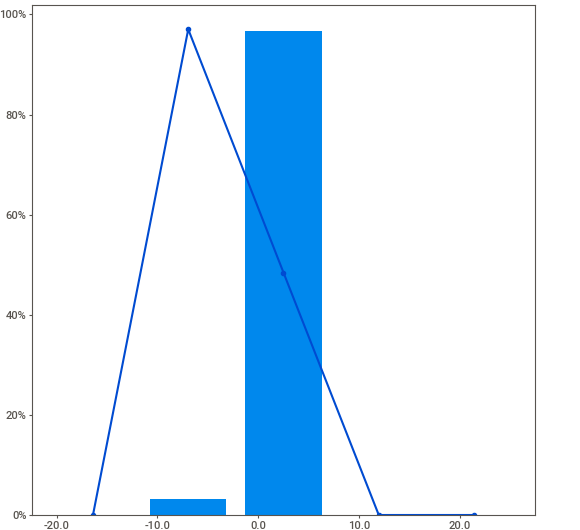
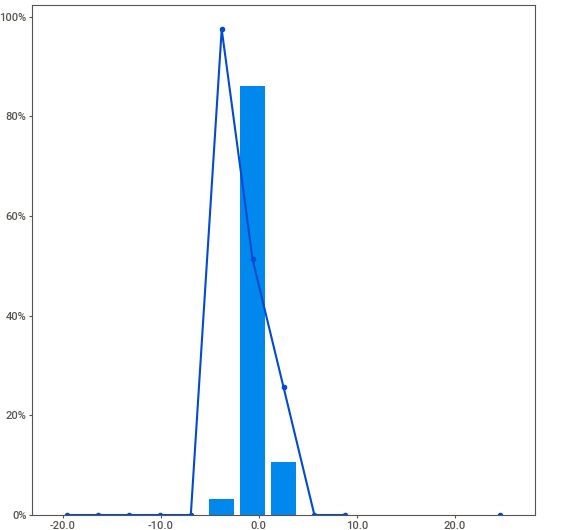
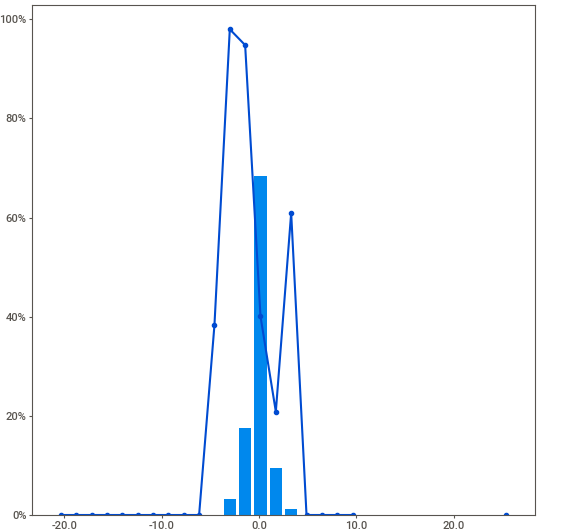
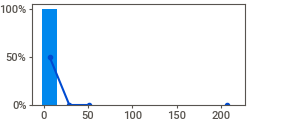
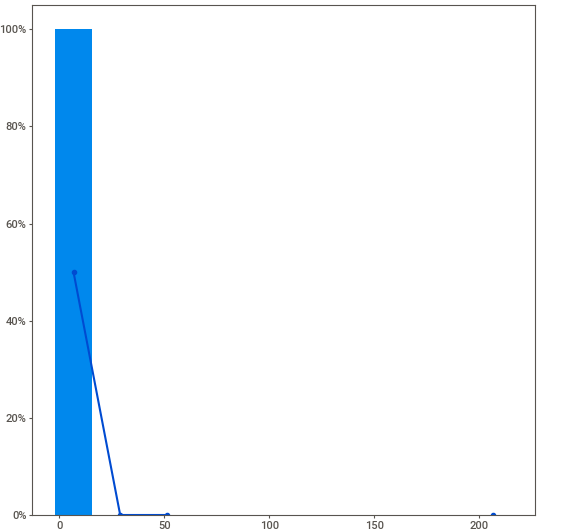
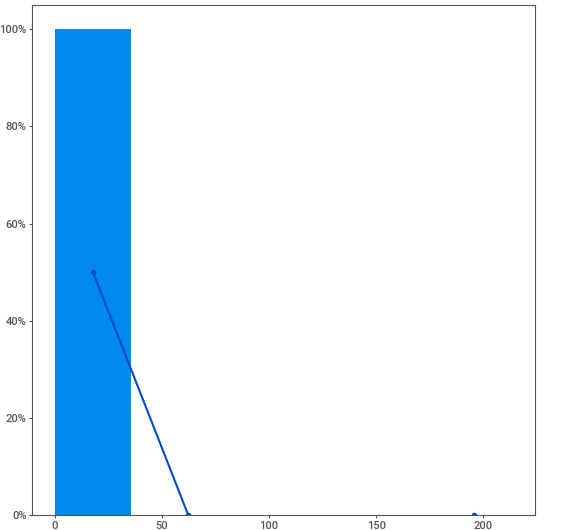
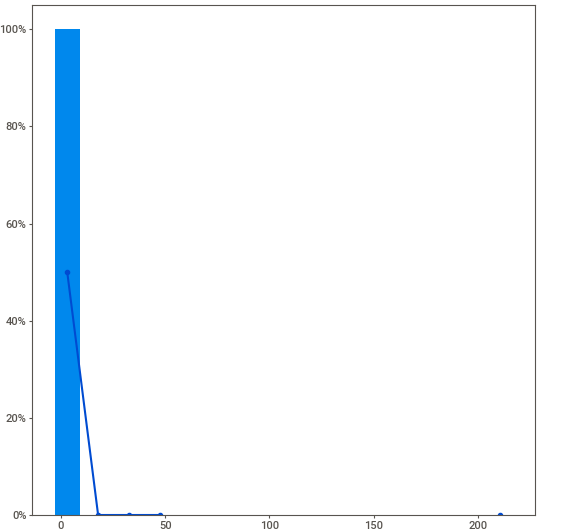
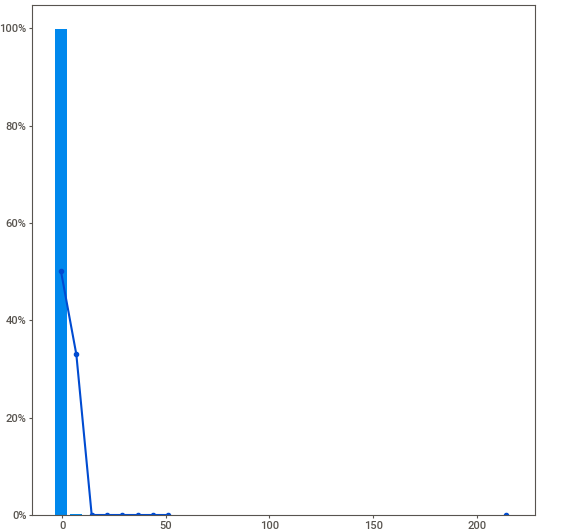
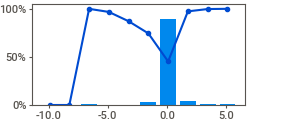
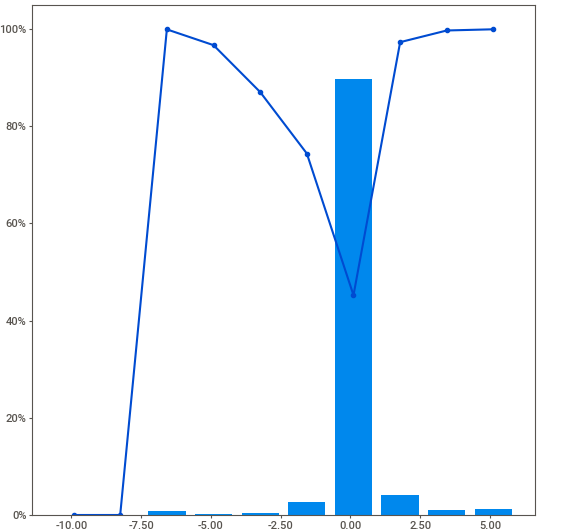
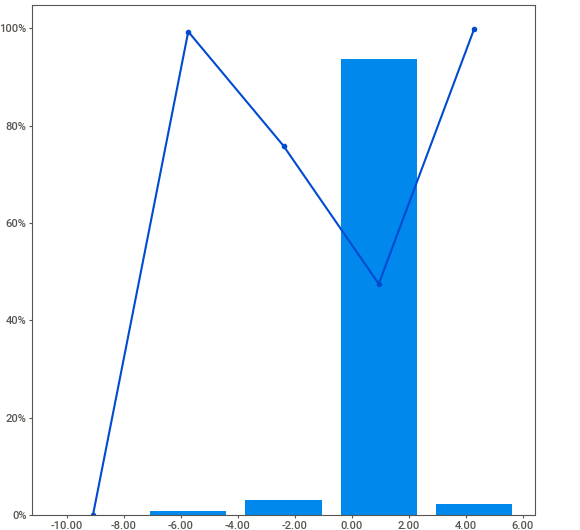
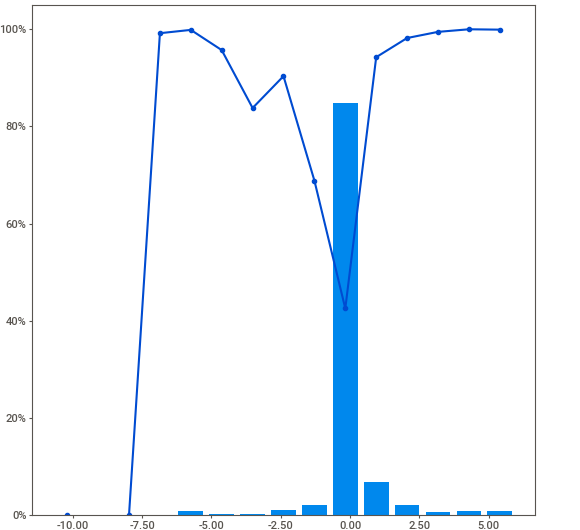
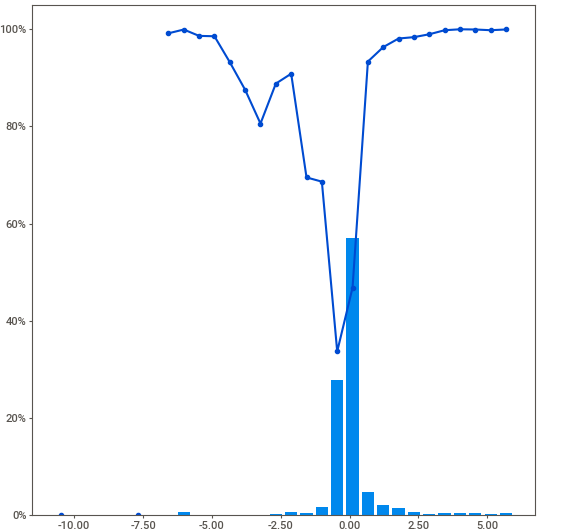
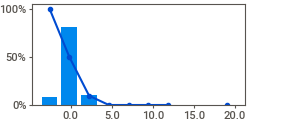
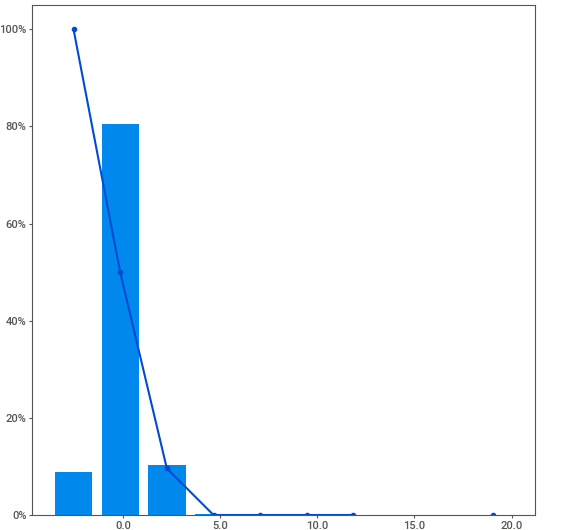
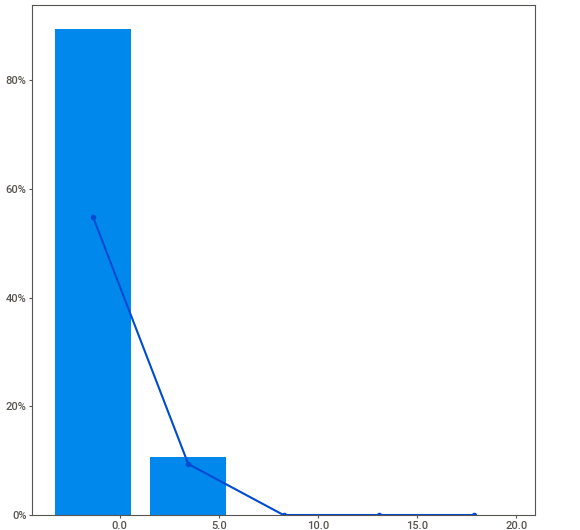
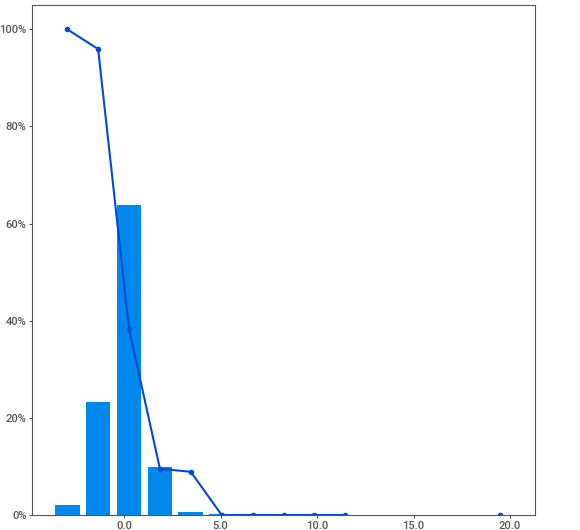
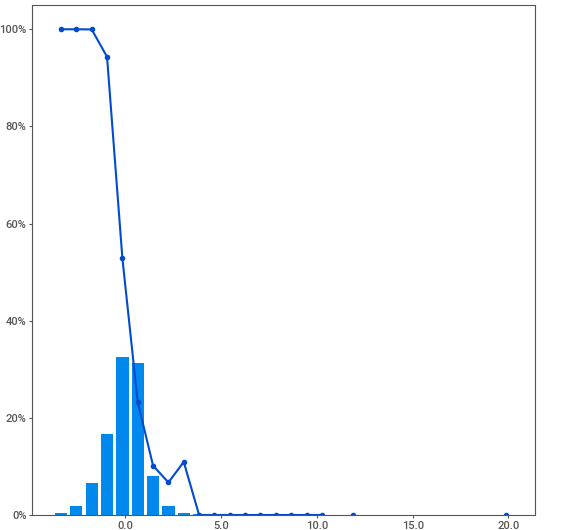
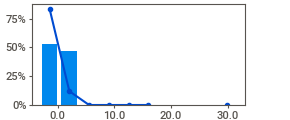
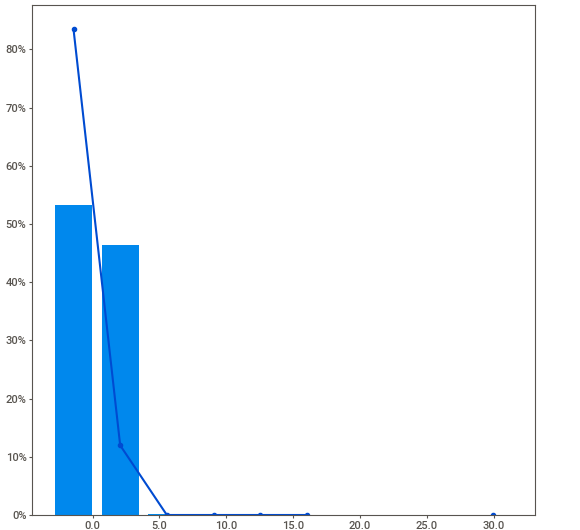
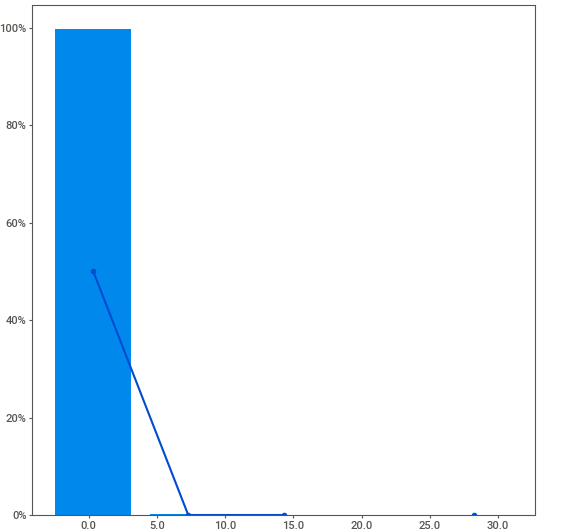
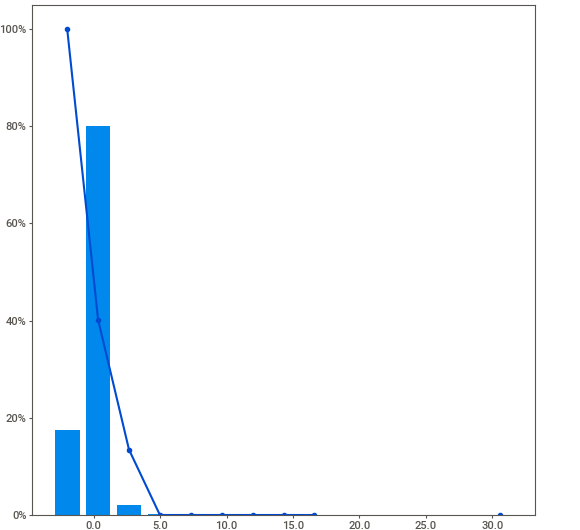
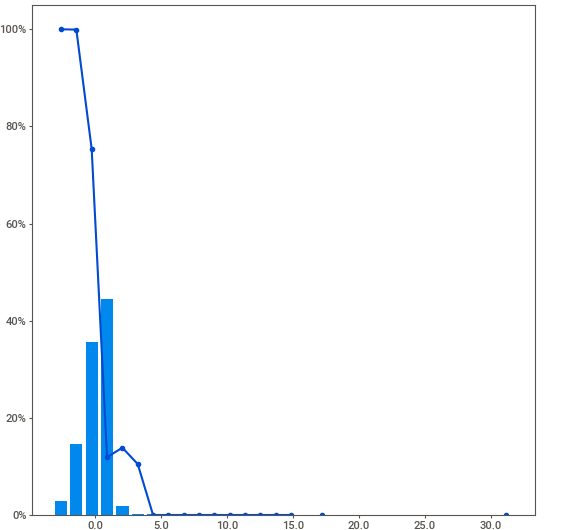
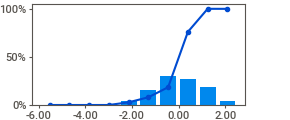
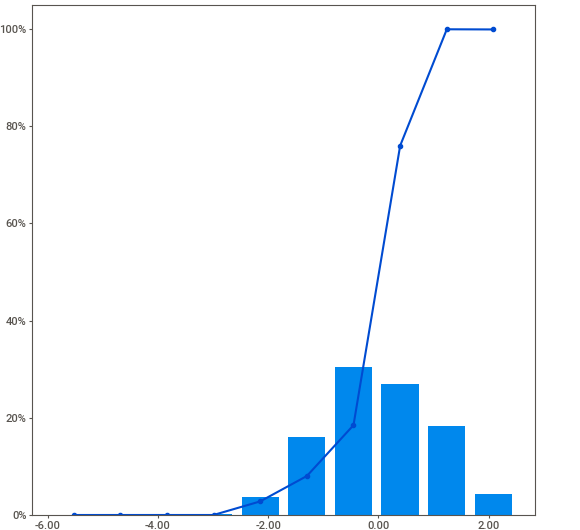
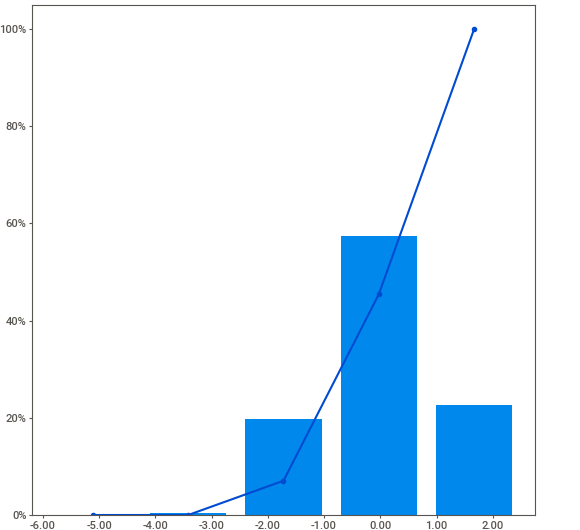
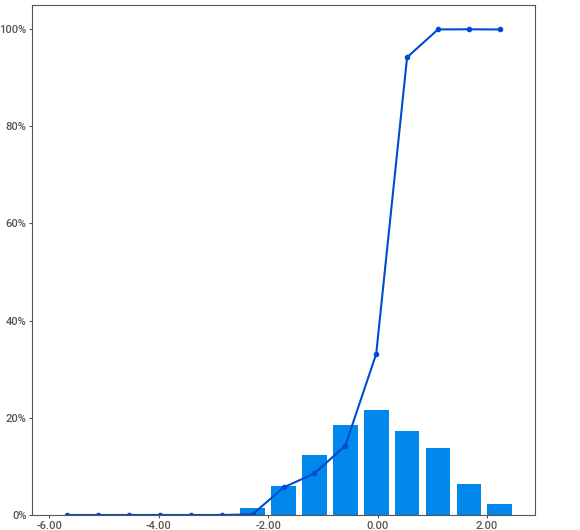
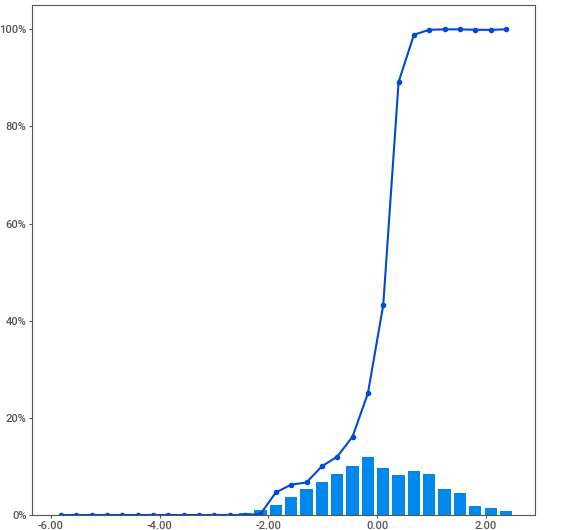
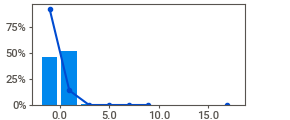
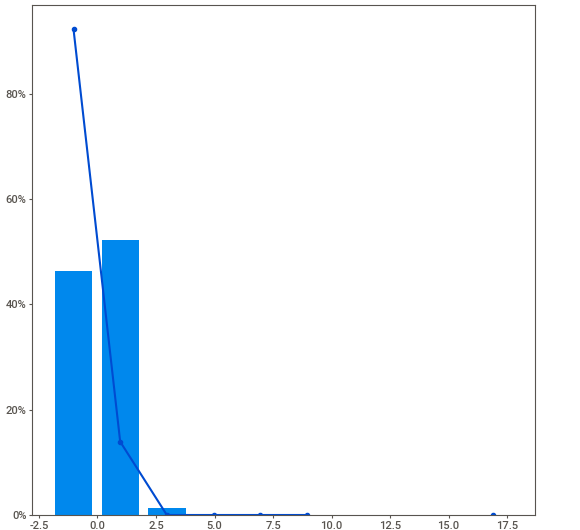
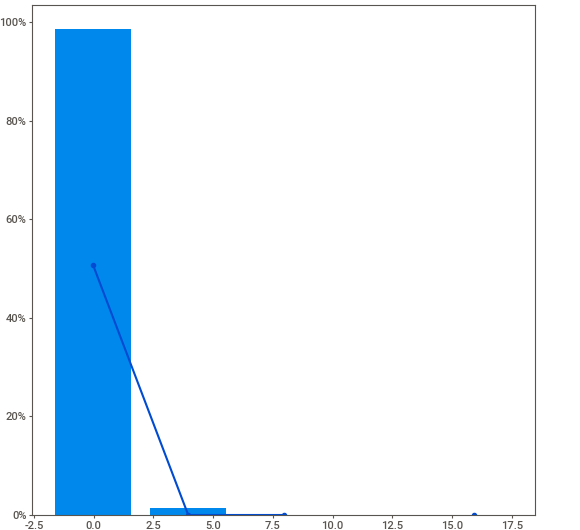
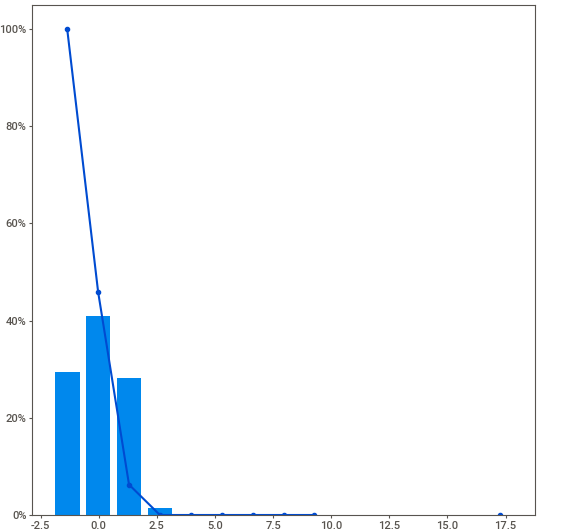
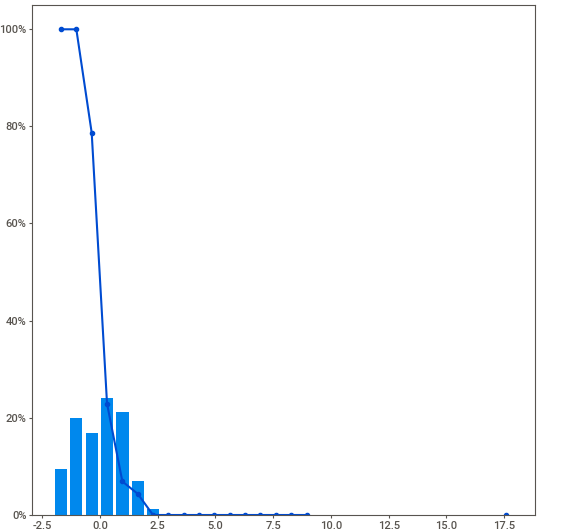
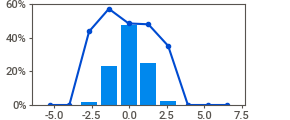
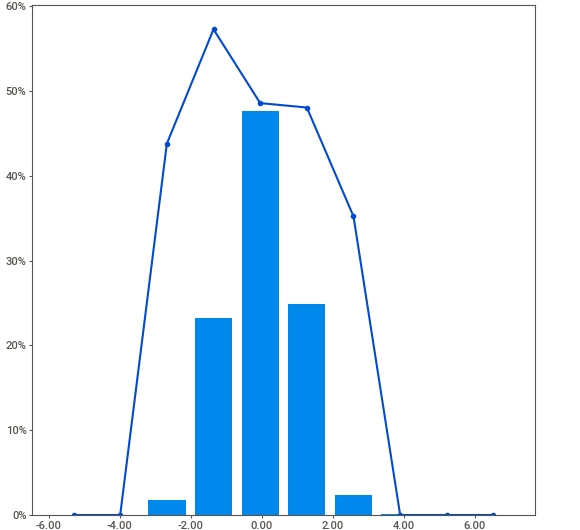
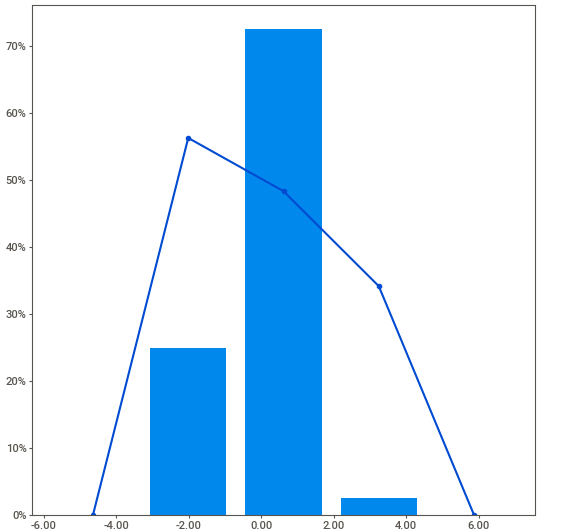
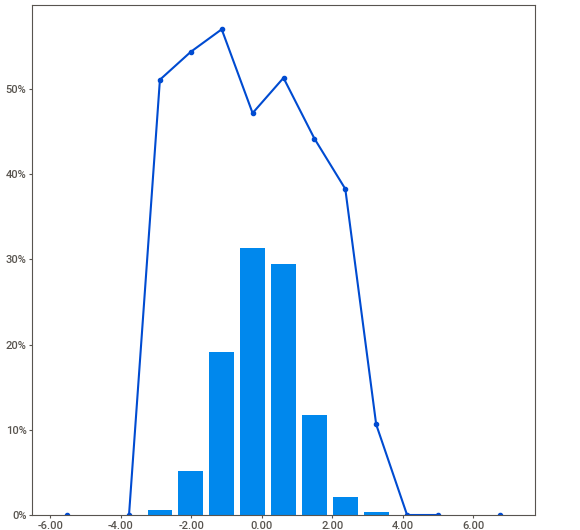
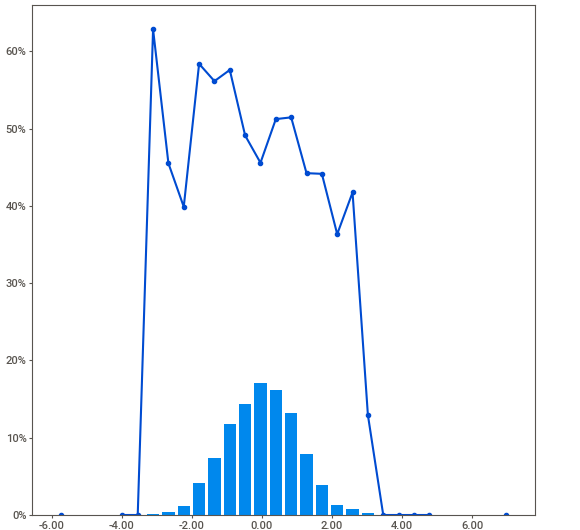
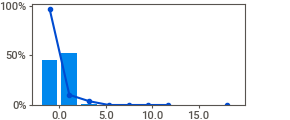
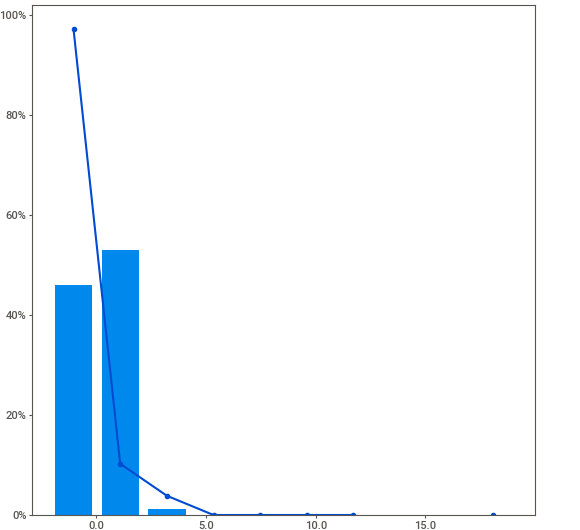
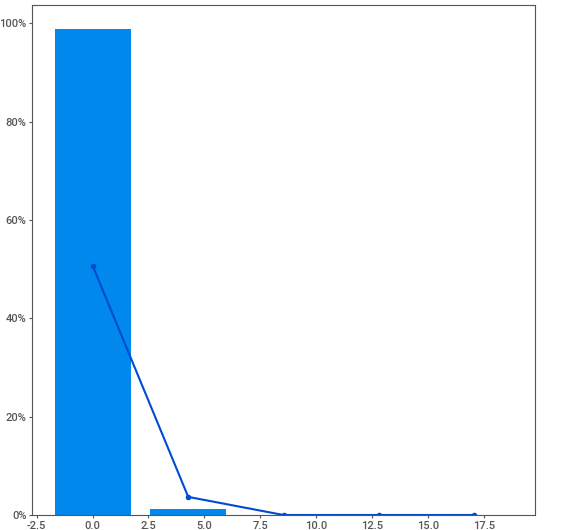
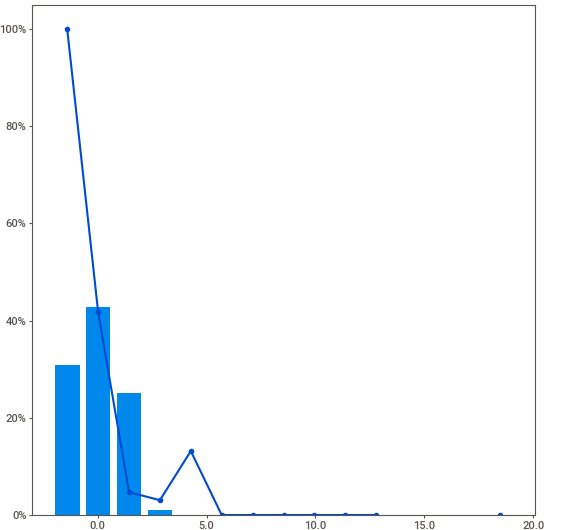
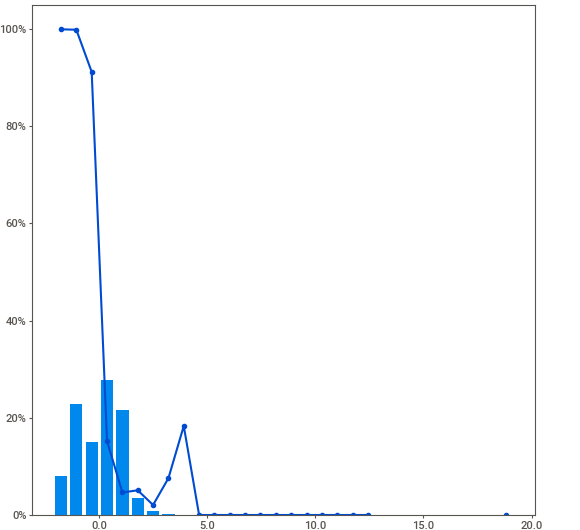
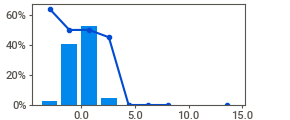
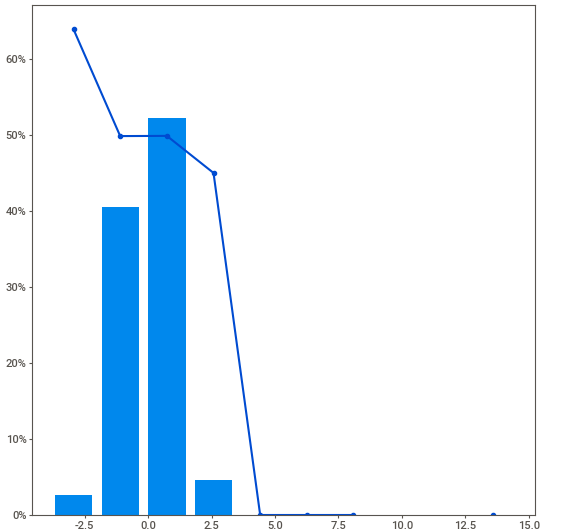
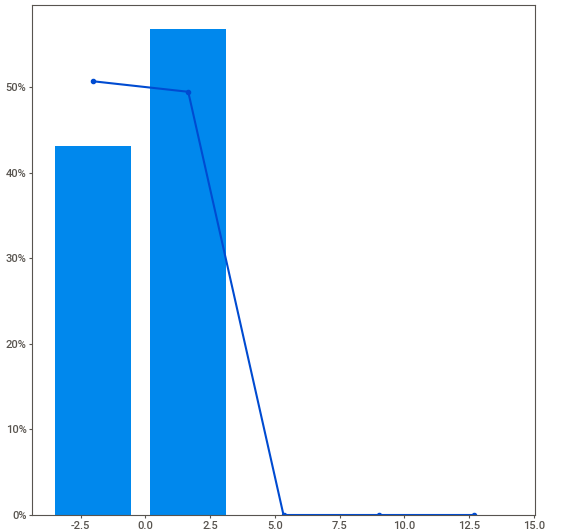
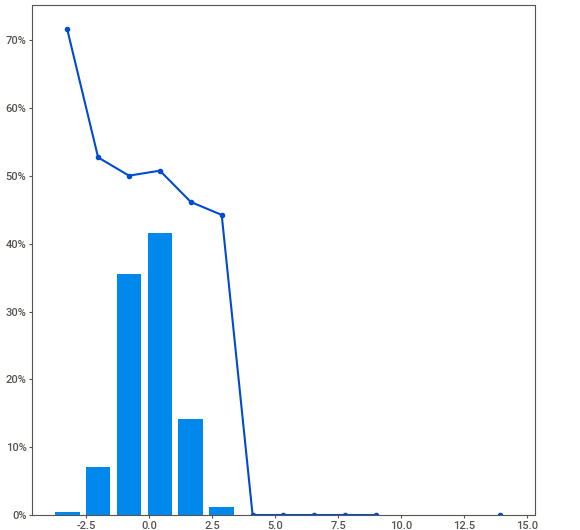
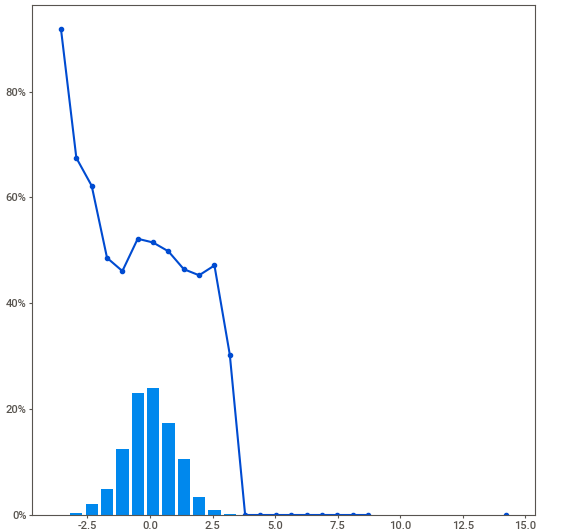
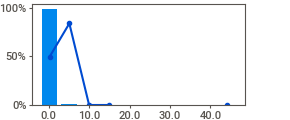
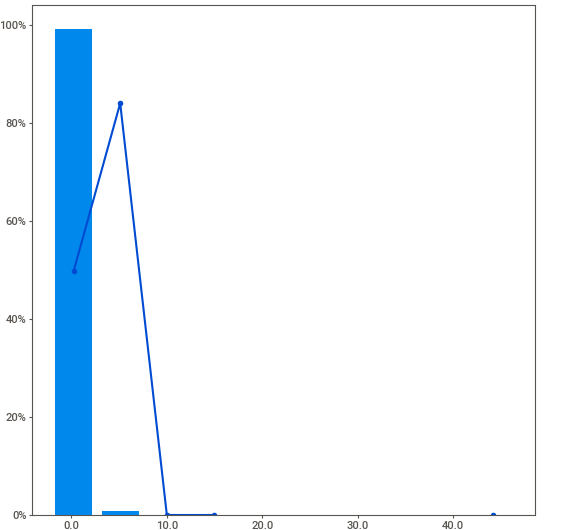
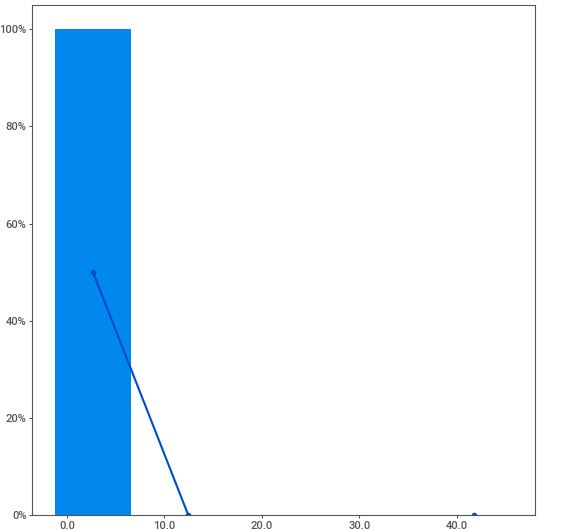
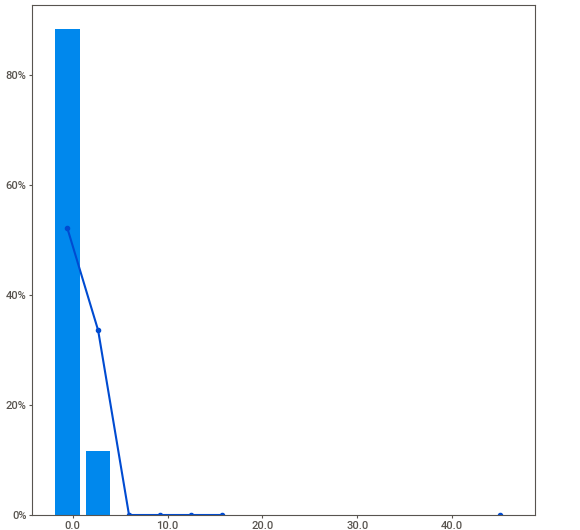
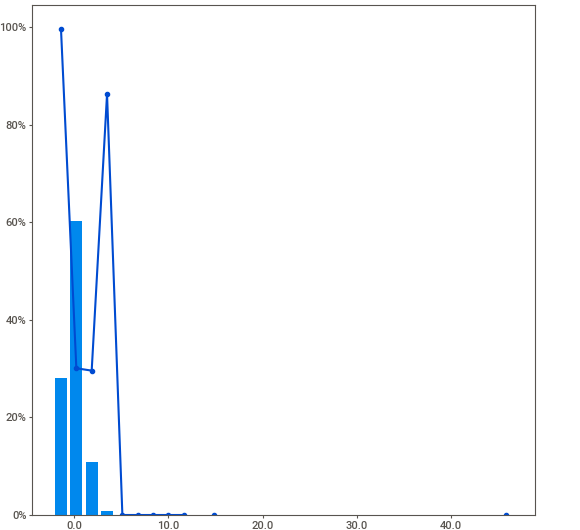
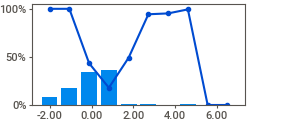
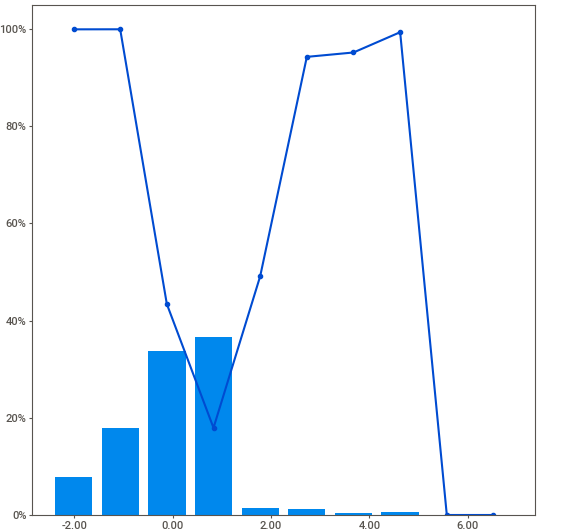
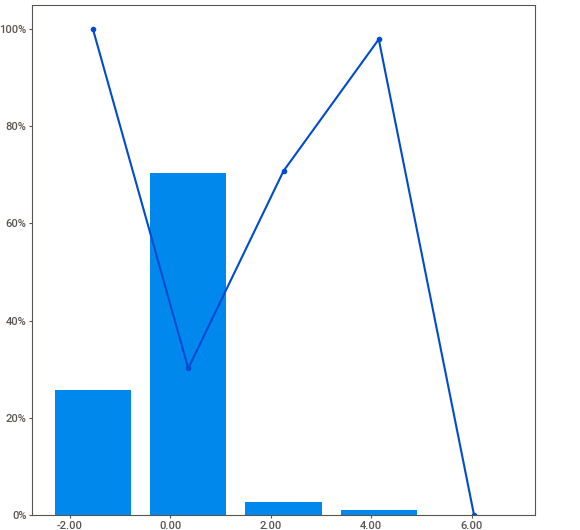
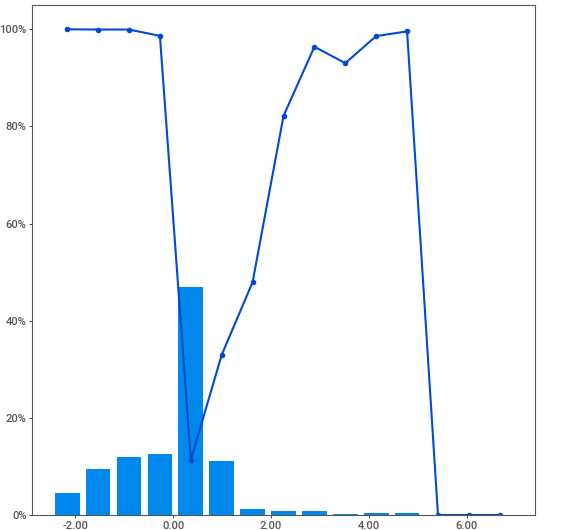
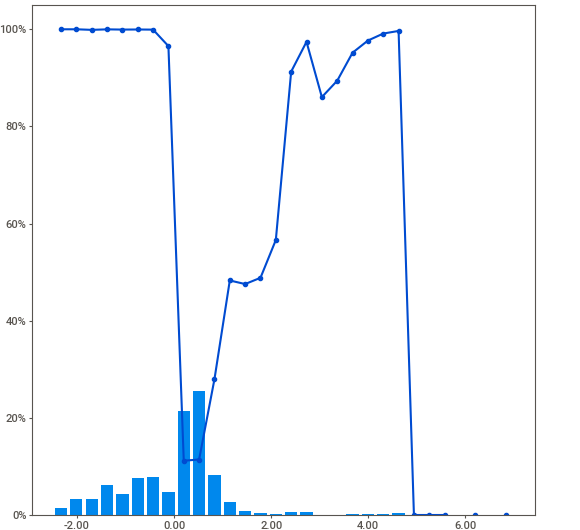
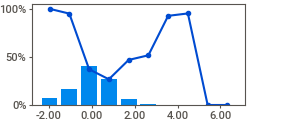
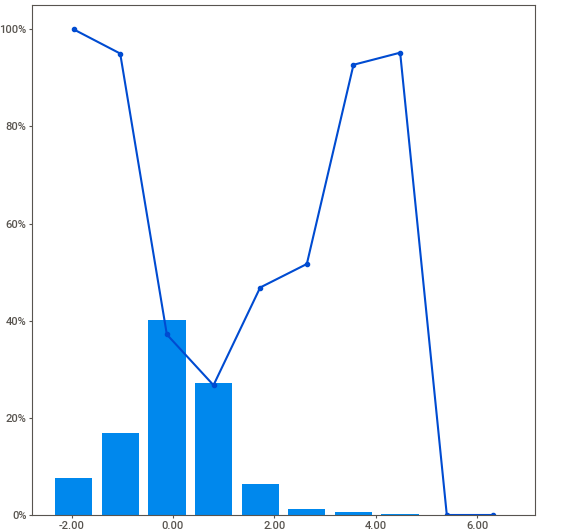
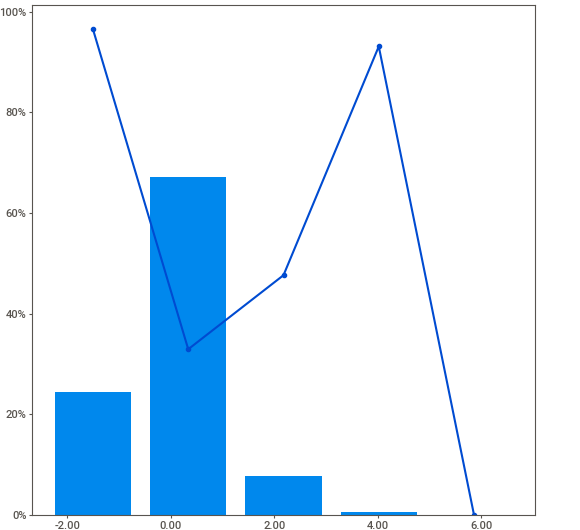
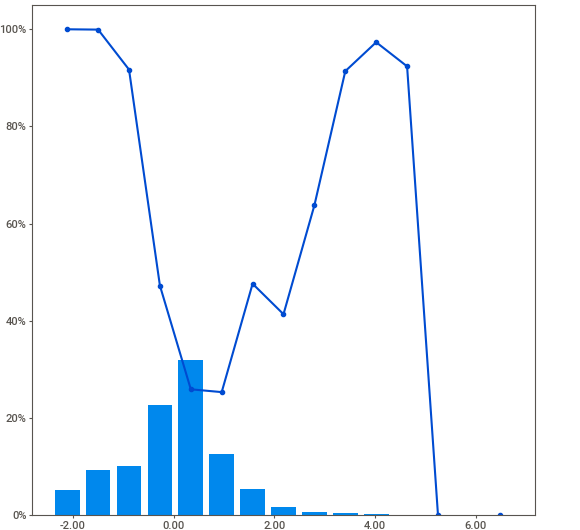
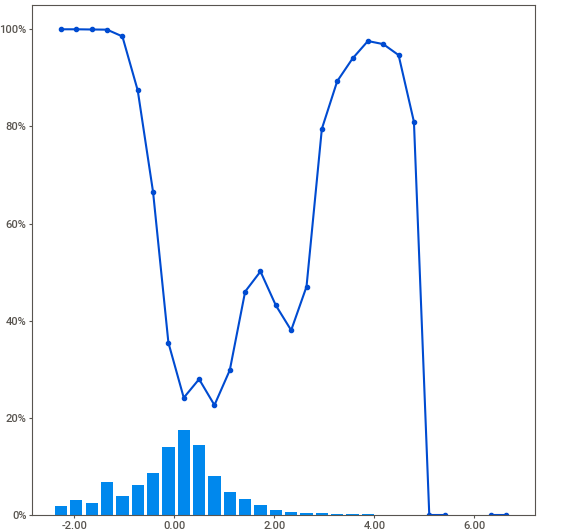
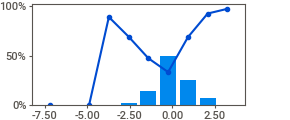
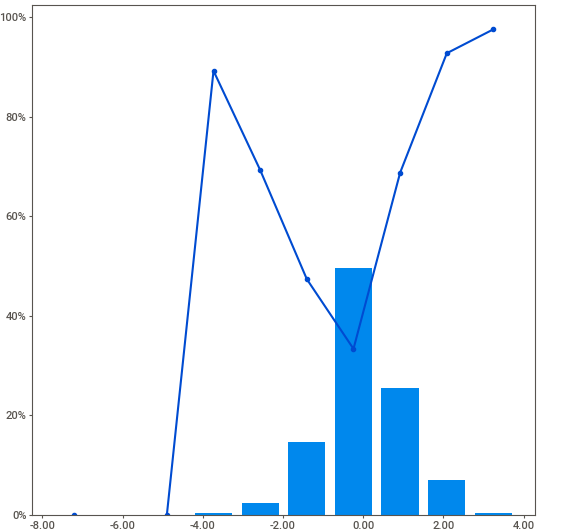
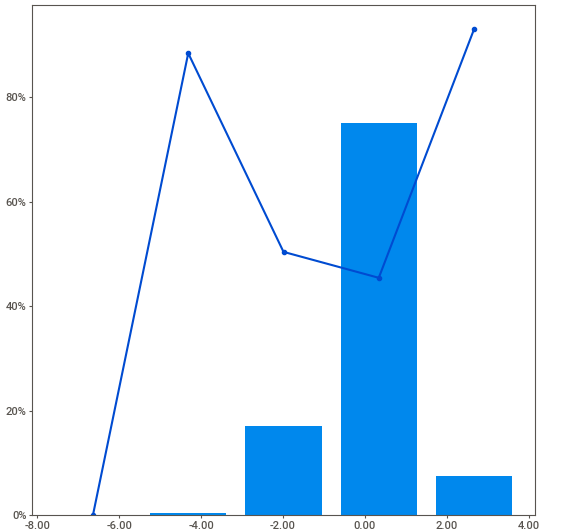
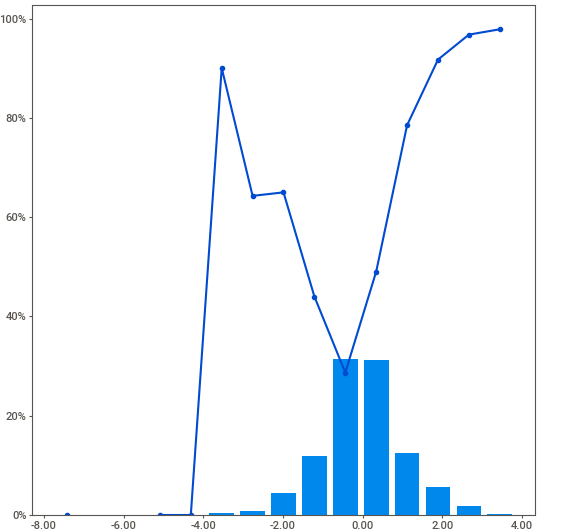
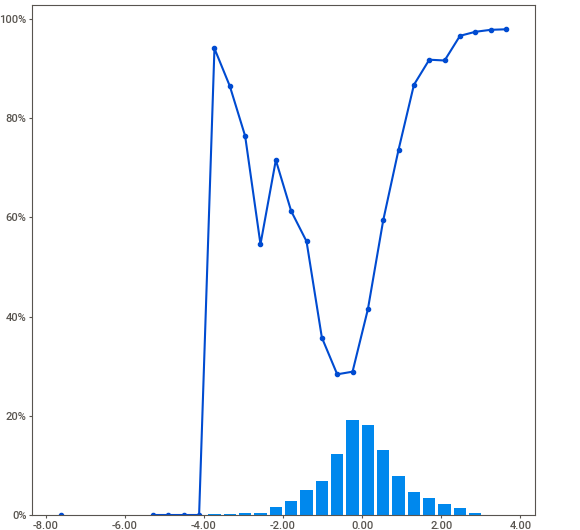
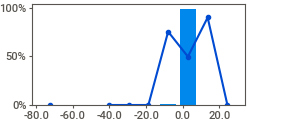
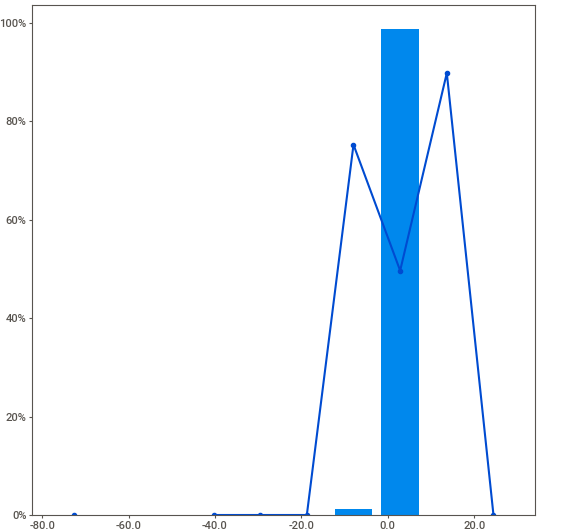
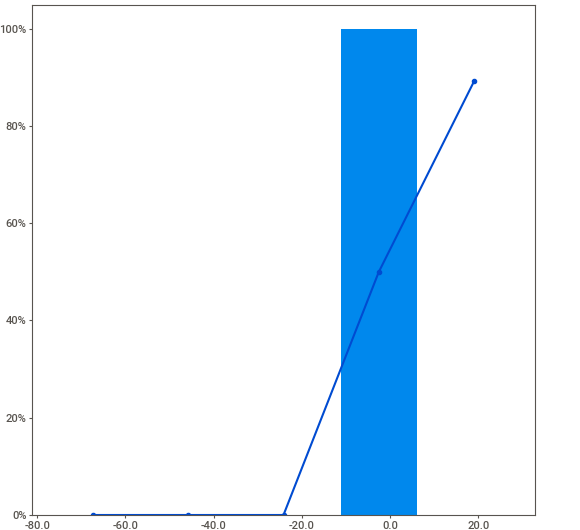
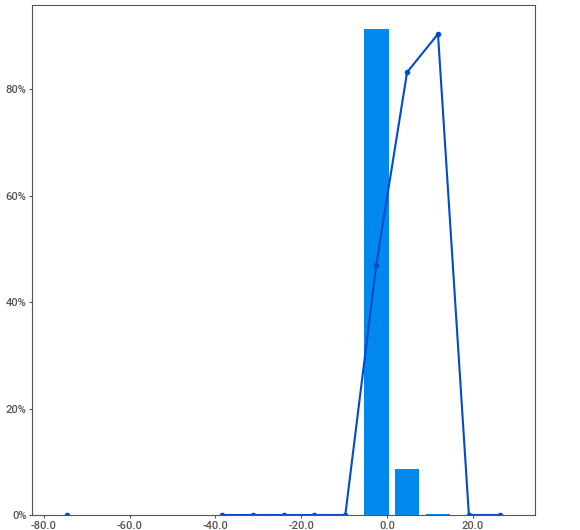
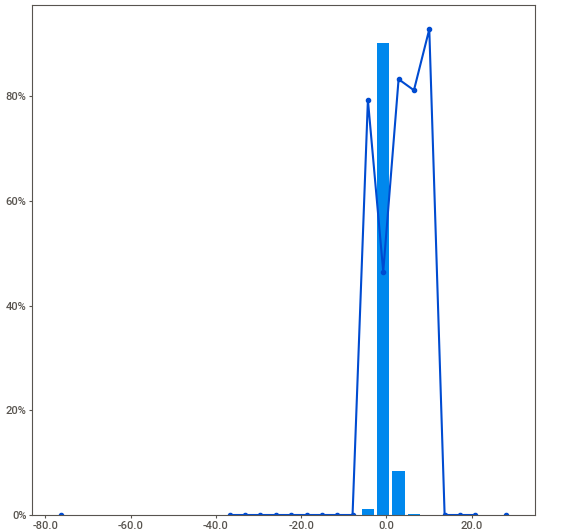
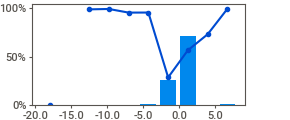
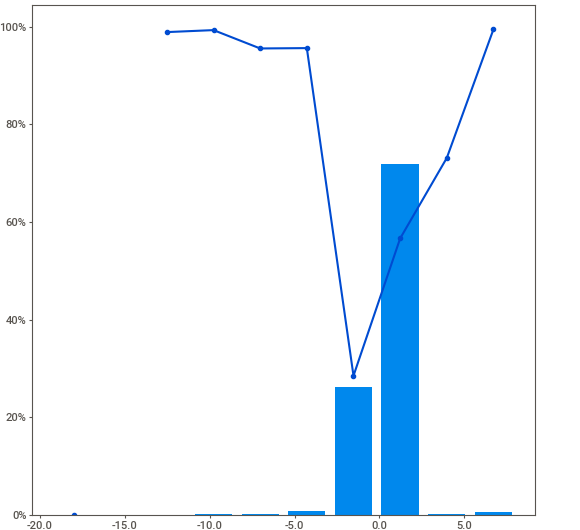
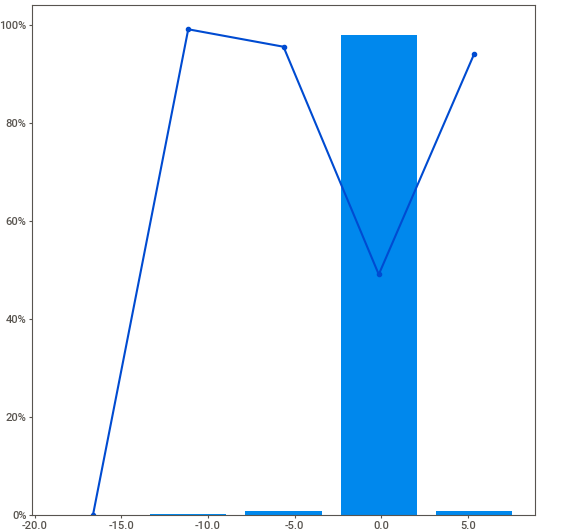
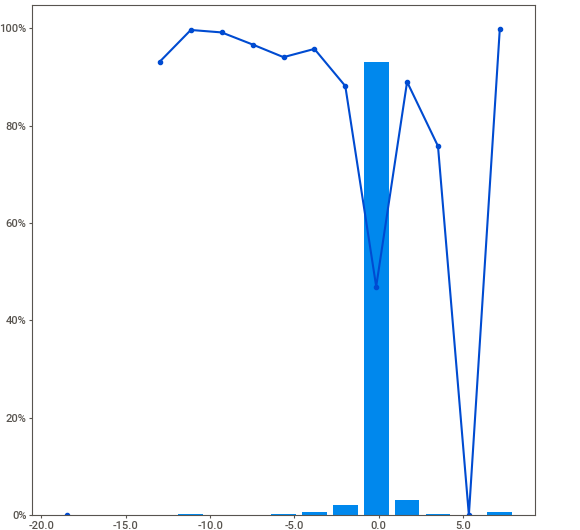
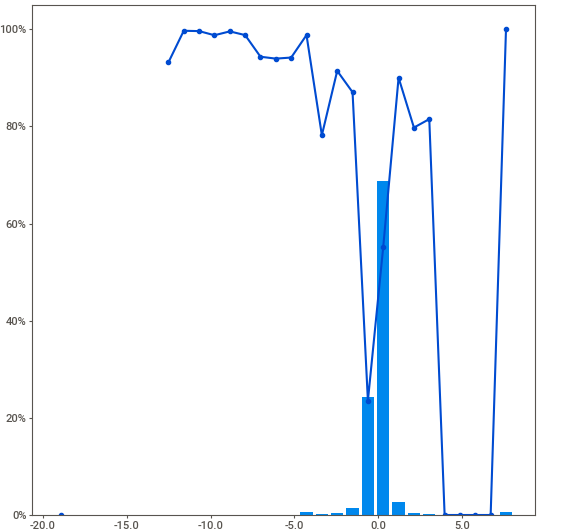
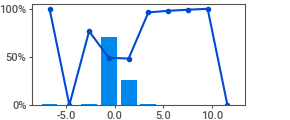
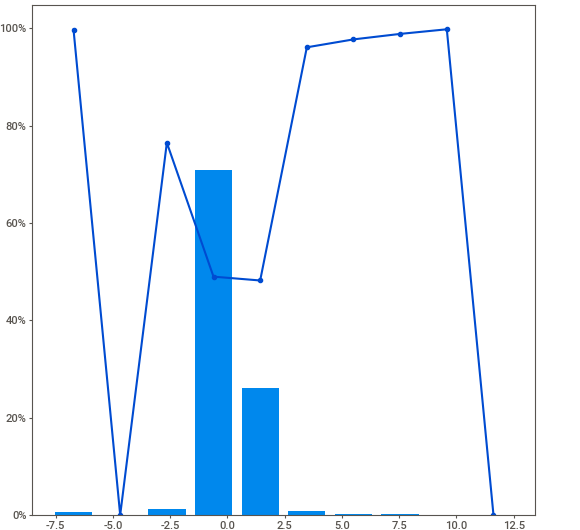
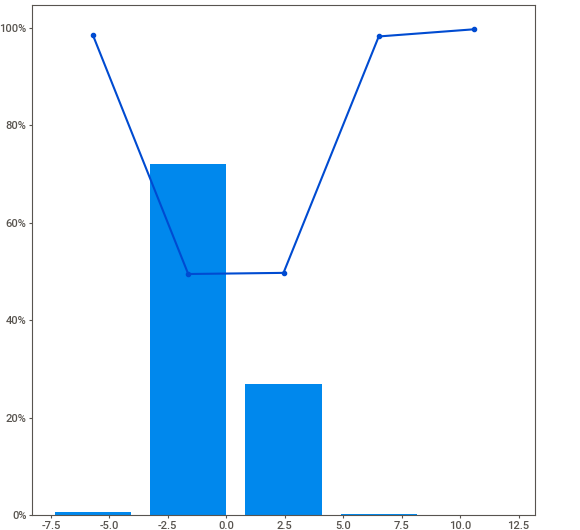
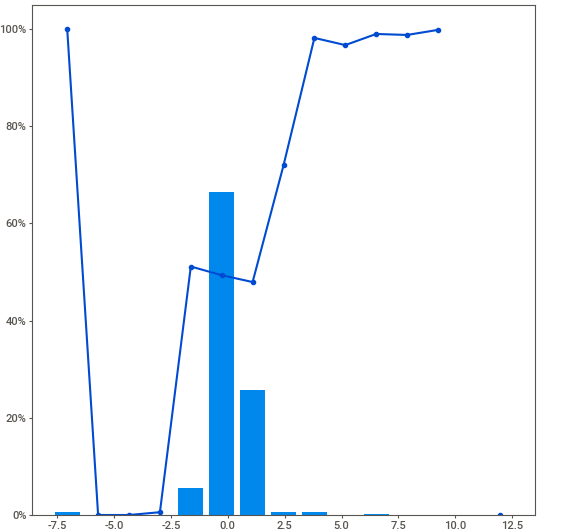
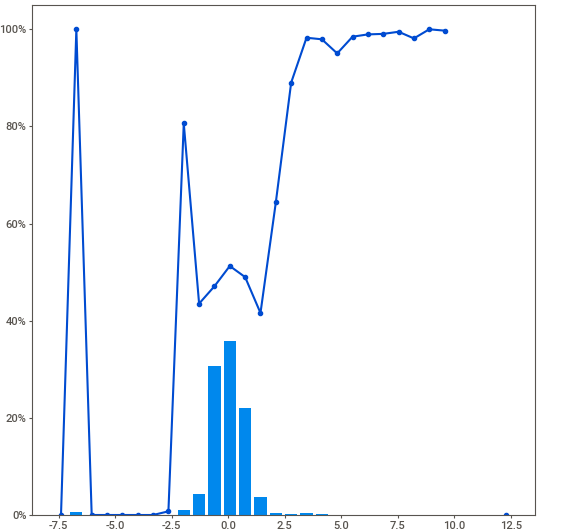
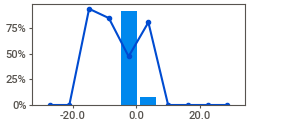
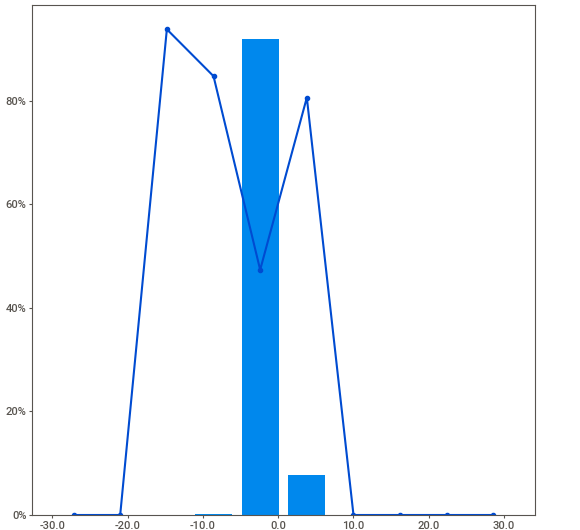
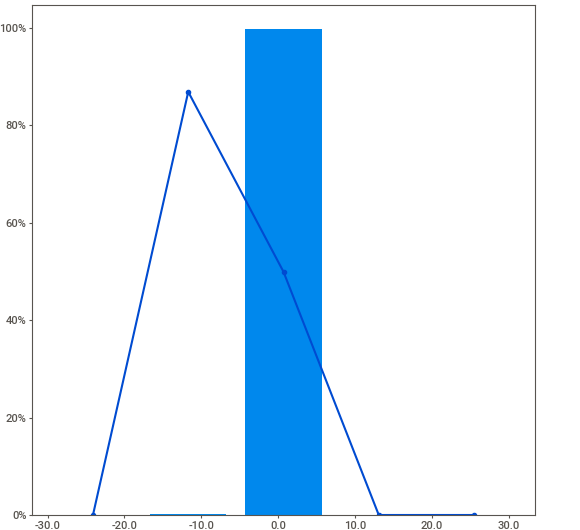
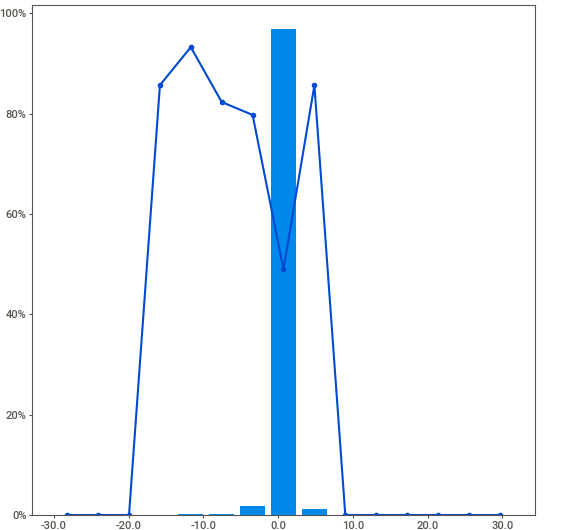
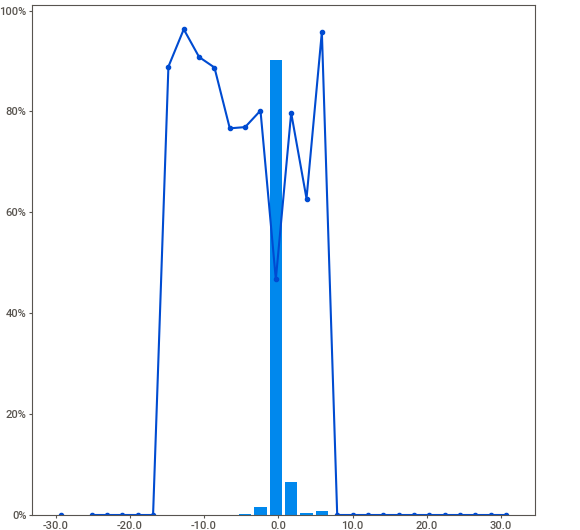
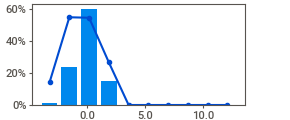
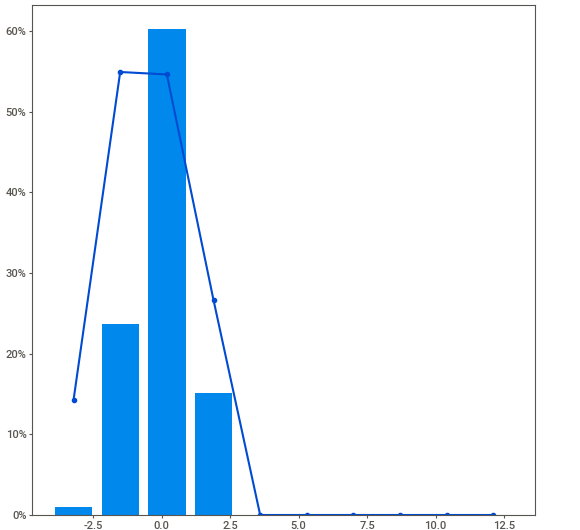
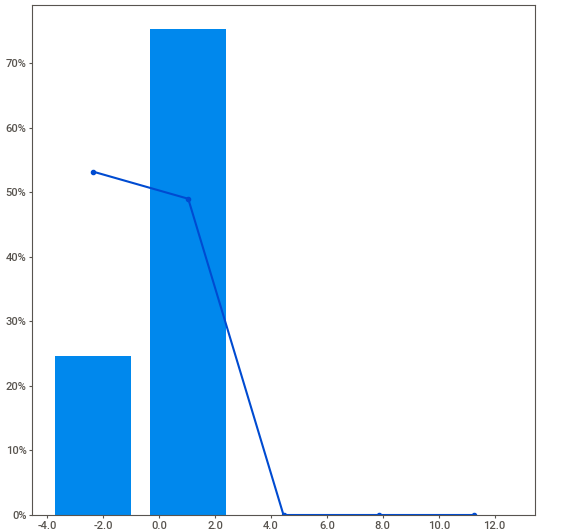
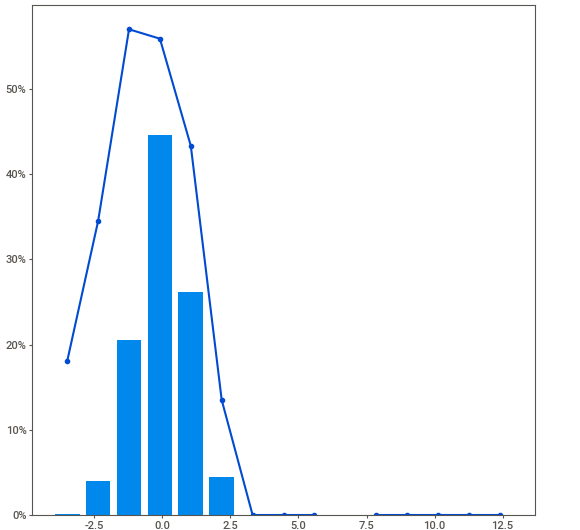
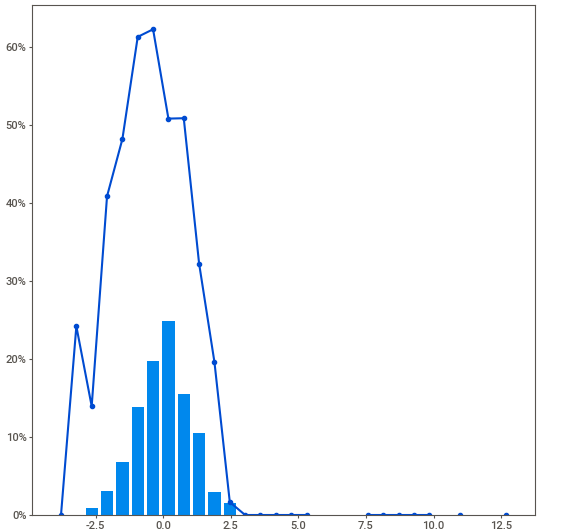
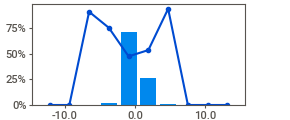
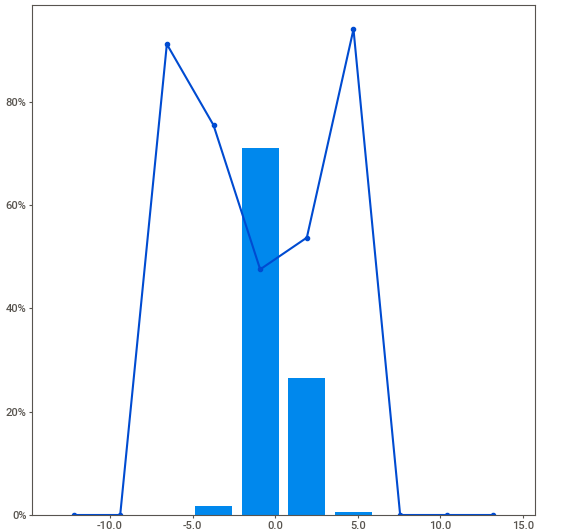
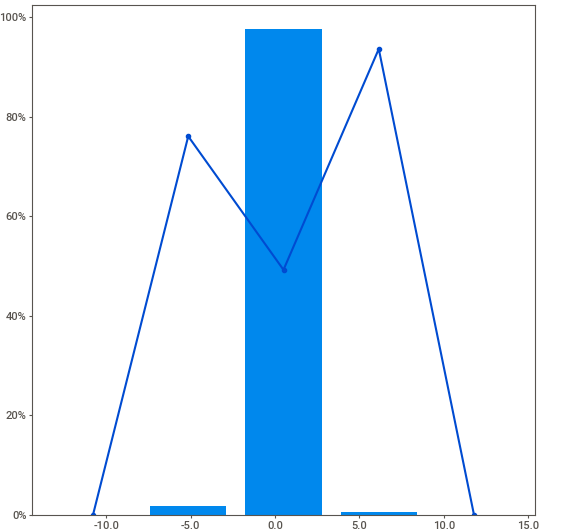
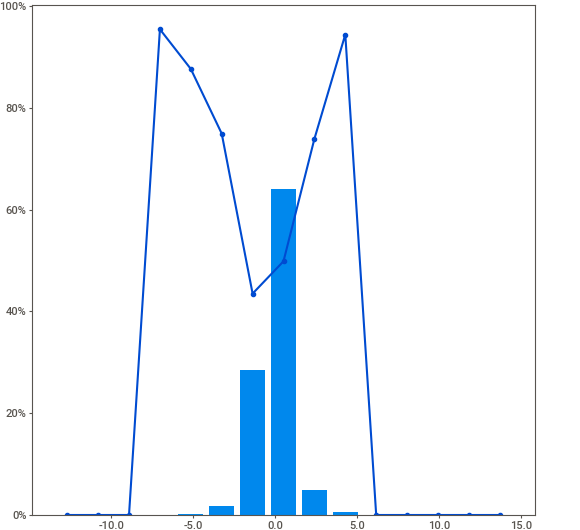
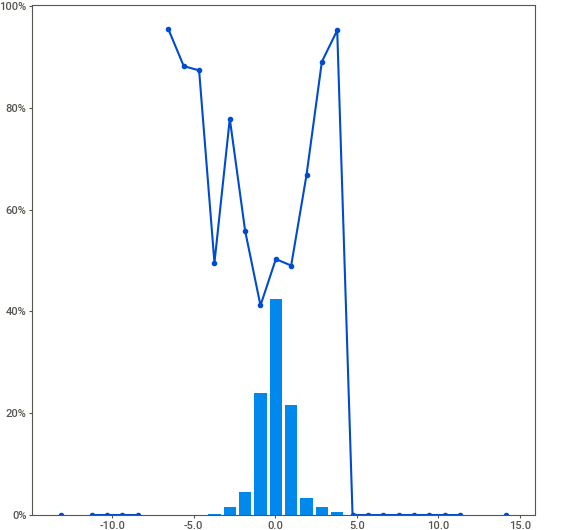
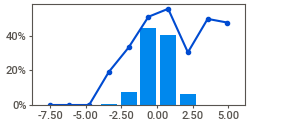
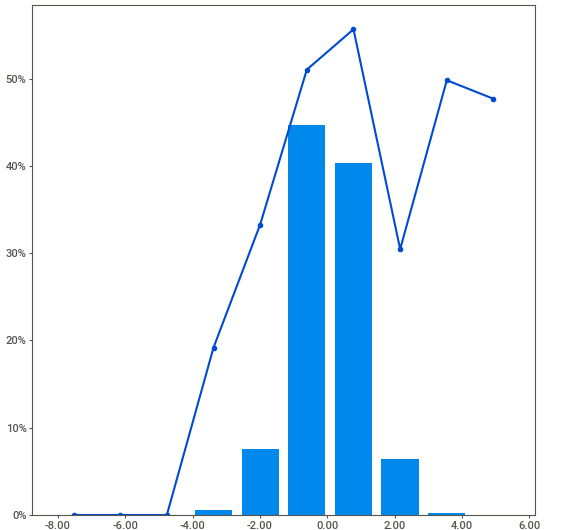
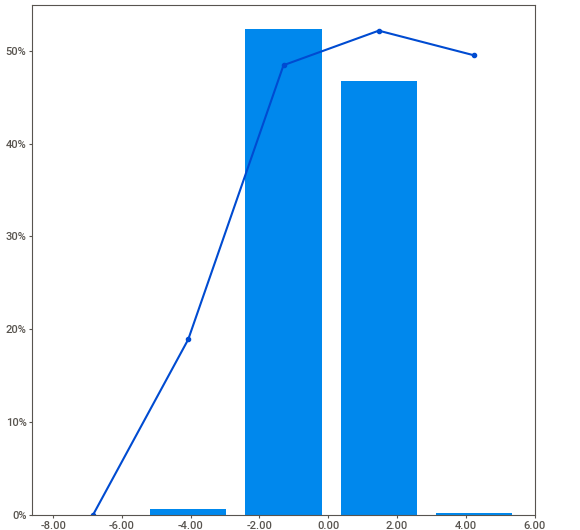
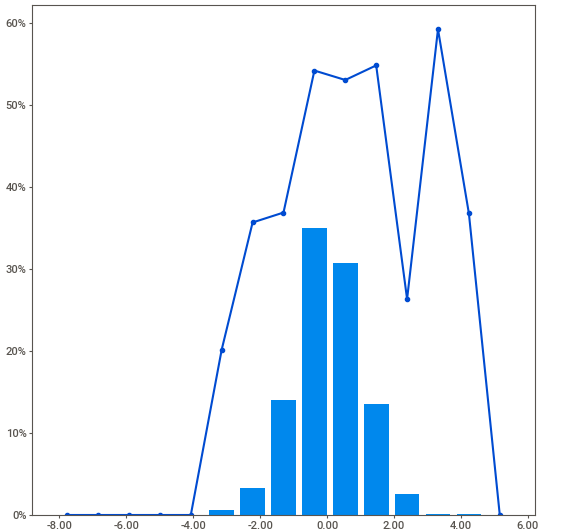
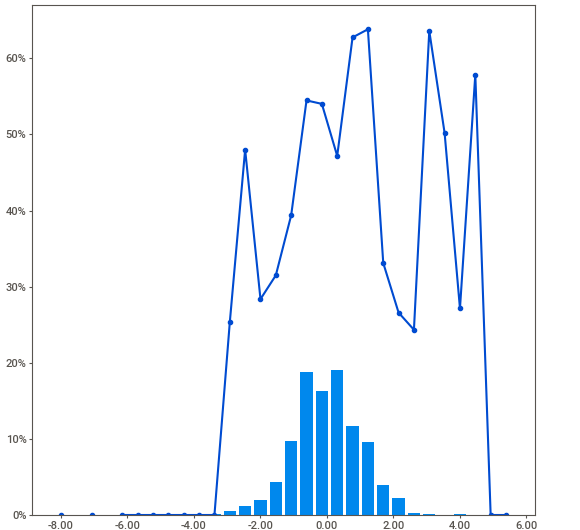
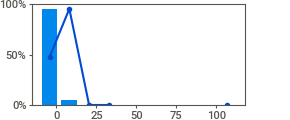
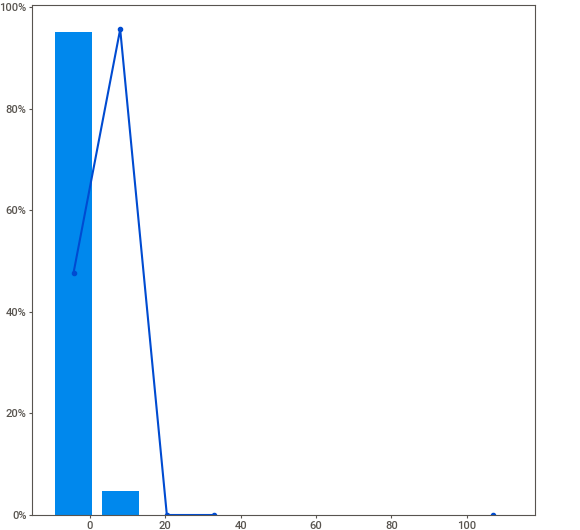
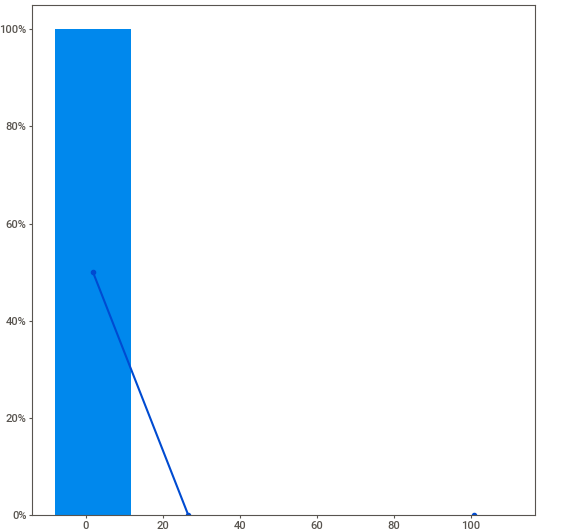
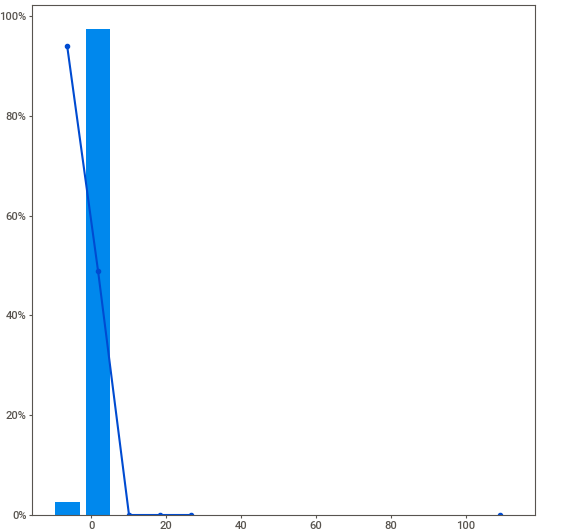
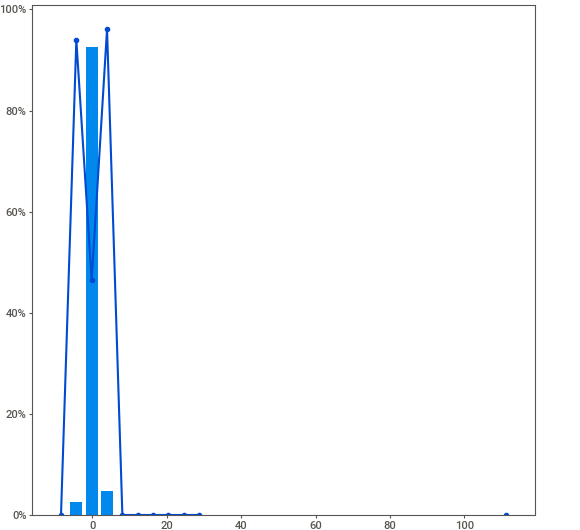
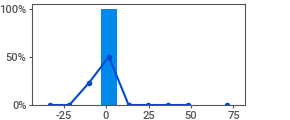
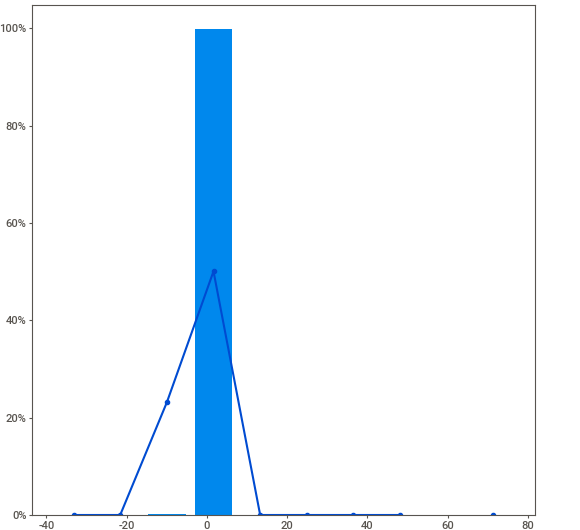
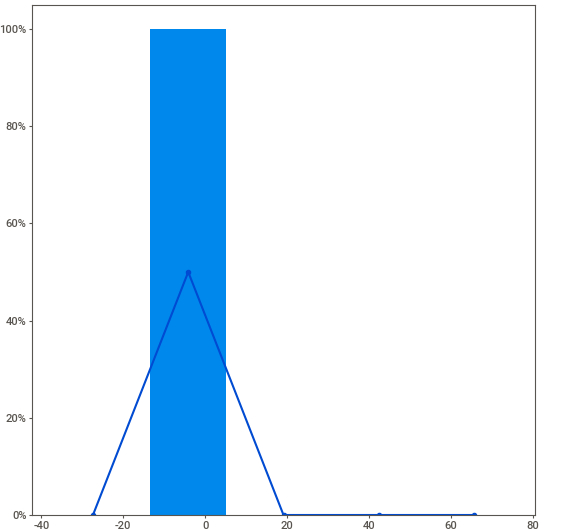
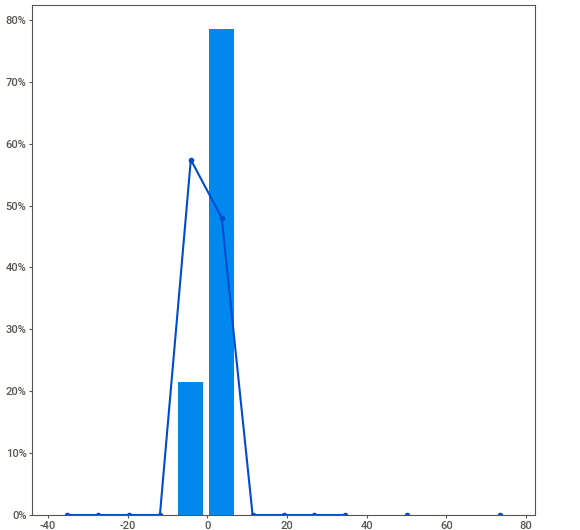
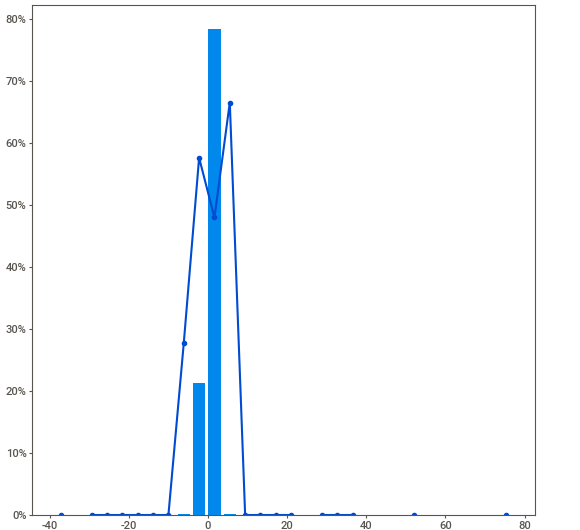
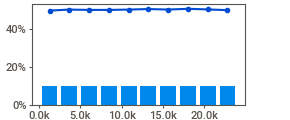
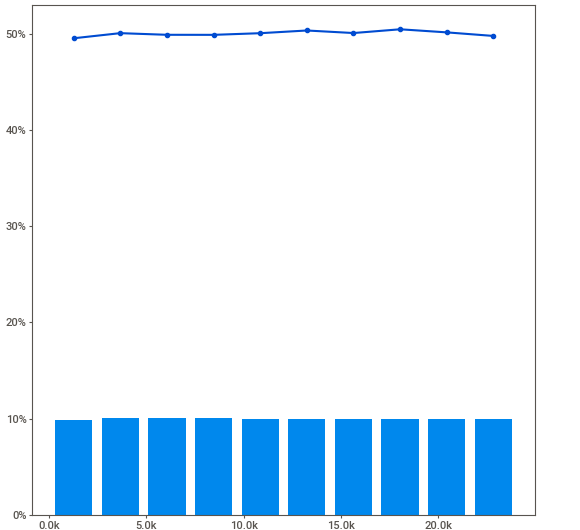
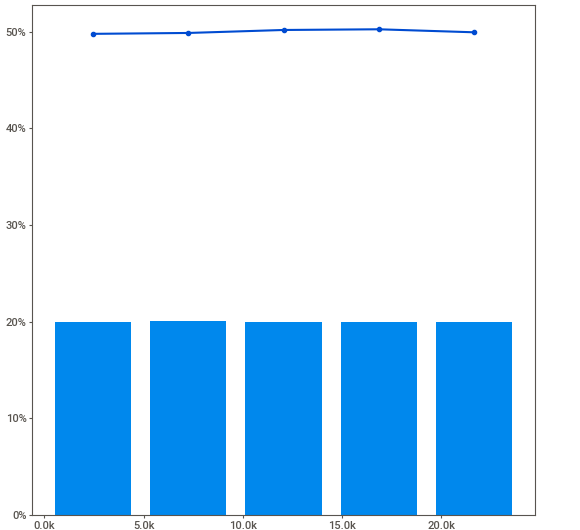
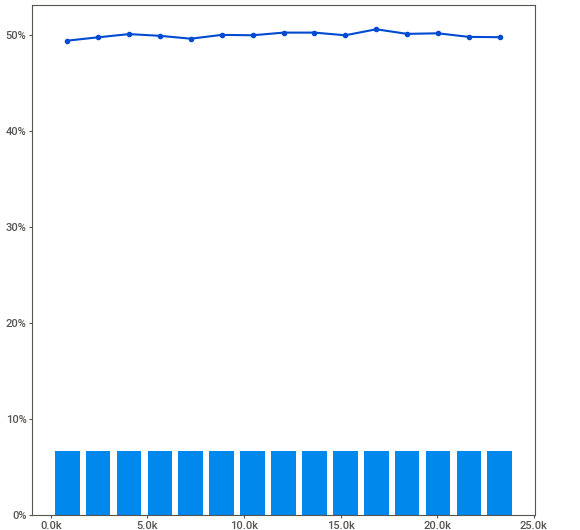
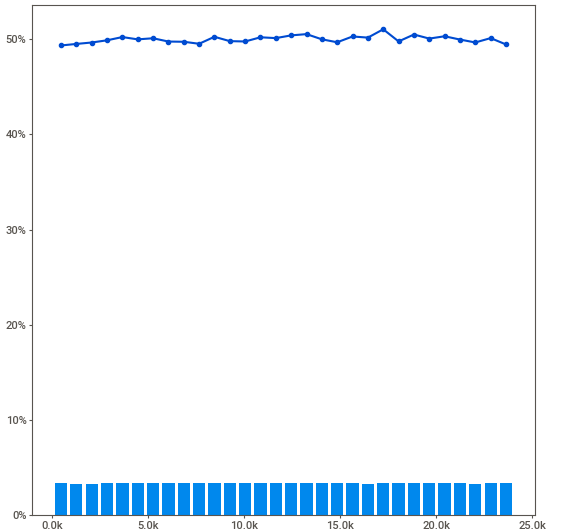
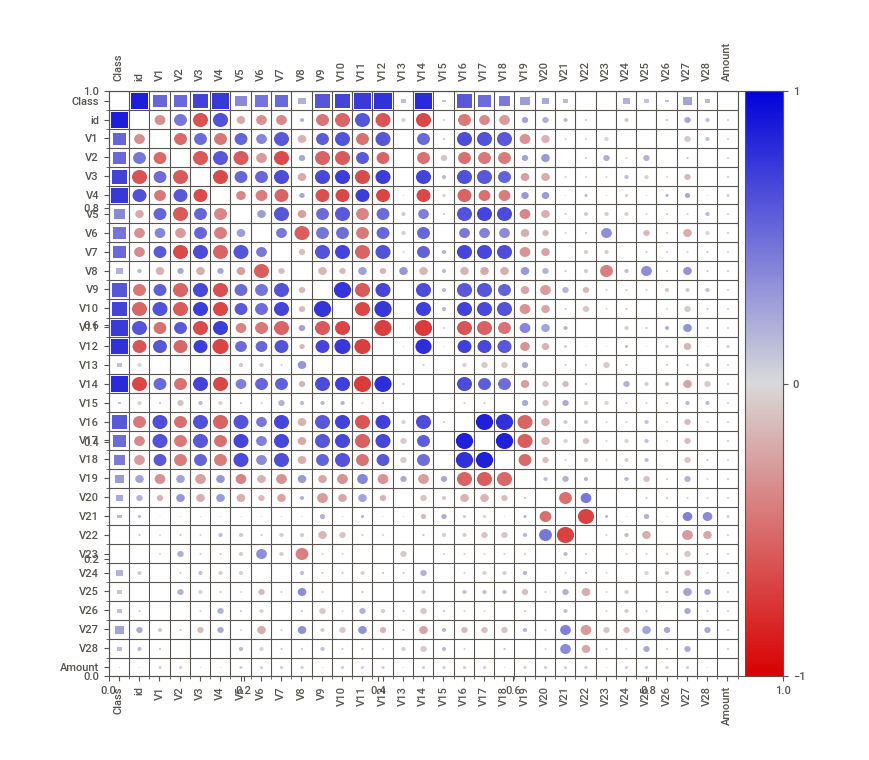
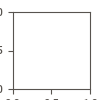

In [7]:
my_report = sv.analyze(df, 'Class')
my_report.show_notebook(w='100%', h='full')

In [8]:
#Since data V1-V28 is confidential, feature engineering is not possible. 

In [9]:
#Train,Validation and Test
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.20, random_state=42)

print('train_df.shape: ',train_df.shape)
print('val_df.shape: ',val_df.shape)
print('test_df.shape: ',test_df.shape)

train_df.shape:  (363923, 31)
val_df.shape:  (90981, 31)
test_df.shape:  (113726, 31)


In [10]:
X_cols = list(df.drop(['Class'], axis=1))
y_col = 'Class'

train_inputs, train_target = train_df[X_cols].copy(), train_df[y_col].copy()
val_inputs, val_target = val_df[X_cols].copy(), val_df[y_col].copy()
test_inputs, test_target = test_df[X_cols].copy(), test_df[y_col].copy()

In [11]:
# Define numeric features (categorical columns doesn't exist in dataset)
numerical_features = [
    'V1','V2','V3','V4','V5','V6','V7','V8','V9','V10',
    'V11','V12','V13','V14','V15','V16','V17','V18','V19','V20',
    'V21','V22','V23','V24','V25','V26','V27','V28','Amount'
]

#Preprocessor for pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components=0.95)) 
        ]), numerical_features),
    ])

#Models to train with default hyperparameter
models = {
    'KNeighbors': KNeighborsClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0)
}

#Creating pipeline
def create_pipeline(model):
    return Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

In [12]:
results = {}
for name, model in tqdm(models.items(), desc="Evaluating Models"):
    pipeline = create_pipeline(model)
    pipeline.fit(train_inputs, train_target)
    y_pred = pipeline.predict(val_inputs)

    accuracy = accuracy_score(val_target, y_pred)
    
    results[name] = {'Accuracy': accuracy}

for model_name, accuracy in results.items():
    print(f"{model_name}: ACCURACY={accuracy['Accuracy']:.4f}")

Evaluating Models: 100%|██████████| 2/2 [03:03<00:00, 91.63s/it] 

KNeighbors: ACCURACY=0.9973
CatBoost: ACCURACY=0.9995


In [13]:
#Ensembling
#Creating pipeline
def create_ensemble_pipeline(model):
    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

#Models for ensembling
best_models = {
    'KNeighbors': KNeighborsClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0),
}

#StackingClassifier & VotingClassifier
stacking_classifier = StackingClassifier(
    estimators=[
        ('kneighbors', best_models['KNeighbors']),
        ('catboost', best_models['CatBoost']),
    ],
)

voting_classifier = VotingClassifier(
    estimators=[
        ('kneighbors', best_models['KNeighbors']),
        ('catboost', best_models['CatBoost']),
    ]
)

ensemble_models = {
    'Stacking': create_ensemble_pipeline(stacking_classifier),
    'Voting': create_ensemble_pipeline(voting_classifier)
}

In [14]:
ensemble_results = {}
for name, pipeline in tqdm(ensemble_models.items(), desc="Evaluating Ensemble"):
    pipeline.fit(train_inputs, train_target)
    y_pred = pipeline.predict(val_inputs)

    accuracy = accuracy_score(val_target, y_pred)
    
    ensemble_results[name] = {'Accuracy': accuracy}

for model_name, accuracy in ensemble_results.items():
    print(f"{model_name}: ACCURACY={accuracy['Accuracy']:.4f}")

Evaluating Ensemble: 100%|██████████| 2/2 [16:37<00:00, 498.85s/it]

Stacking: ACCURACY=0.9997
Voting: ACCURACY=0.9996


In [15]:
#Summary
#KNeighbors: ACCURACY=0.9973
#CatBoost: ACCURACY=0.9995

#Stacking: ACCURACY=0.9997
#Voting: ACCURACY=0.9996

#Stacking (KNeighbors + CatBoost) work best

In [16]:
#Helper function for final model (stacking = KNeighbors + CatBoost)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components=0.95)) 
        ]), numerical_features),
    ])

#Models for ensembling
best_models = {
    'KNeighbors': KNeighborsClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0),
}

stacking_classifier = StackingClassifier(
    estimators=[
        ('kneighbors', best_models['KNeighbors']),
        ('catboost', best_models['CatBoost']),
    ],
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', stacking_classifier)
])

pipeline.fit(train_inputs, train_target)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.95))]),
                                                  ['V1', 'V2', 'V3', 'V4', 'V5',
                                                   'V6', 'V7', 'V8', 'V9',
                                                   'V10', 'V11', 'V12', 'V13',
                                                   'V14', 'V15', 'V16', 'V17',
                                                   'V18', 'V19', 'V20', 'V21',
                                                   'V22', 'V23', 'V24', 'V25',
                                                   'V26', 'V27', 'V28',
                                                   'Amount'])])),
                ('model',
                 StackingClassifier(estimators=[('kneighbors',
                                                 KNeighborsClassifier()),
                                                ('catboost',
                                                 <catboost.core.CatBoostClassifier object at 0x000002BA19560F20>)]))])

In [17]:
#Helper function for single input
def predict_fraud_(input_data):
    input_df = pd.DataFrame([input_data])
    prediction = pipeline.predict(input_df)
    return prediction[0]

In [26]:
#Single Input Predict
example_input = {
    'V1': 1.724955,
    'V2': -1.032151,
    'V3': -0.167094, 
    'V4': -1.304005,
    'V5': 0.007942,
    'V6': -0.497093,
    'V7': 0.431224,
    'V8': -0.310432,
    'V9': 0.127247,
    'V10': 1.280402,
    'V11': -0.592005,
    'V12': -0.559465,
    'V13': 1.517358,
    'V14': 2.192510	,
    'V15': -0.880859,
    'V16': -0.041408,
    'V17': 1.034441,
    'V18': 0.285828,
    'V19': -0.583600,
    'V20': -0.298212,
    'V21': -0.121933,
    'V22': 0.064814,
    'V23': -0.173478,
    'V24': -0.203415,
    'V25': 0.269615,
    'V26': 0.084079,
    'V27': -0.370434,
    'V28': -0.219972,
    'Amount': 6325.64,
}

predict_fraud = predict_fraud_(example_input)
if predict_fraud == 0:
    print(f'Fraud Prediction: Not a Fraud')
elif predict_fraud == 1:
    print(f'Fraud Prediction: Fraud')
else:
    print(f'Error. Please check input')

Fraud Prediction: Not a Fraud
